# 제 8회 데이터 분석 경진대회 - 2020 빅콘테스트

### 참가분야 : 데이터 분석 챔피언리그
### 날짜: 2020년 09월 28일
### 팀명: team_A(공금령, 엄인영, 유수화, 이수현, 한선호)

In [1]:
! python -V

Python 3.7.8


-------

# 1. 라이브러리 및 데이터
# Library & Data

In [16]:
# 데이터 처리
import pandas as pd
import numpy as np
import tensorflow as tf

# 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import re
from matplotlib import rc
%matplotlib inline

# 시각화 폰트 깨짐 방지
rc('font', family='AppleGothic')
plt.rcParams['font.family'] = 'AppleGothic'

# 모델링
"""from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz"""
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# RNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, GRU, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [6]:
! pip3 install seaborn
! pip3 install matplotlib
! pip3 install matplotlib.pyplot
! pip3 install sklearn
! pip3 install xgboost

     |████████████████████████████████| 283 kB 477 kB/s eta 0:00:01
  Using cached matplotlib-3.3.2-cp37-cp37m-macosx_10_9_x86_64.whl (8.5 MB)
     |████████████████████████████████| 28.7 MB 3.0 MB/s eta 0:00:01
  Using cached Pillow-7.2.0-cp37-cp37m-macosx_10_10_x86_64.whl (2.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp37-cp37m-macosx_10_9_x86_64.whl (60 kB)
You should consider upgrading via the '/Users/aohus/.pyenv/versions/3.7.8/envs/py3_7_8/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/aohus/.pyenv/versions/3.7.8/envs/py3_7_8/bin/python3.7 -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
You should consider upgrading via the '/Users/aohus/.pyenv/versions/3.7.8/envs/py3_7_8/bin/python3.7 -m pip install --upgrade pip' command.


In [12]:
! /Users/aohus/.pyenv/versions/3.7.8/envs/py3_7_8/bin/python3.7 -m pip install --upgrade pip

  Using cached pip-20.2.3-py2.py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 20.1.1
    Uninstalling pip-20.1.1:
      Successfully uninstalled pip-20.1.1


In [77]:
# 사용한 데이터 불러오기
maindata = pd.read_csv("maindata.csv")
weather_df = pd.read_csv("weather2019.csv")

In [78]:
maindata.head(6)

,datetime,exposure,mother_code,code,name,category,price,revenue
0,2019.1.1 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019.1.1 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019.1.1 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019.1.1 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019.1.1 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"
5,2019.1.1 6:40,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","9,337,000"


# 2. 데이터 전처리
# Data Cleansing & Pre-Processing

In [50]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     38309 non-null  object 
 1   exposure     21525 non-null  float64
 2   mother_code  38309 non-null  int64  
 3   code         38309 non-null  int64  
 4   name         38309 non-null  object 
 5   category     38309 non-null  object 
 6   price        38309 non-null  object 
 7   revenue      37372 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.3+ MB


In [79]:
# 가격(price) 실수형으로 변환
maindata['price'] = maindata['price'].str.replace(',','')
maindata['price'] = maindata['price'].str.replace('   ','')
maindata['price'] = maindata['price'].str.replace('    ','')
maindata.apply(pd.to_numeric, errors = 'coerce') 
maindata['price'] = pd.to_numeric(maindata['price'])

In [80]:
# 매출(revenue) 실수형으로 변환
maindata['revenue'] = maindata['revenue'].str.replace(',','')
maindata['revenue'] = pd.to_numeric(maindata['revenue'])

In [81]:
# 매출 / 단가 = count(수량) 변수로 추가
maindata['count'] = maindata['revenue'] / maindata['price']

In [82]:
# 탐색적 자료분석을 위한 시간 추가
maindata['year'] = pd.to_datetime(maindata['datetime']).dt.year
maindata['month'] = pd.to_datetime(maindata['datetime']).dt.month
maindata['date'] = pd.to_datetime(maindata['datetime']).dt.day
maindata['hour'] = pd.to_datetime(maindata['datetime']).dt.hour

maindata['dayofweek'] = pd.to_datetime(maindata['datetime']).dt.dayofweek

In [83]:
# 제목에 성별 들어가는 item 분류할 수 있는 feature 추가
sex_list = []

for i in range(len(maindata)):
    if set(maindata['name'][i].split()) & {"남성"} :
        sex_list.append("남성")
    elif set(maindata['name'][i].split()) & {"여성"} :
        sex_list.append("여성")
    else :
        sex_list.append("무관")
maindata['sex'] = sex_list

In [84]:
# 제목에 installment(할부) 들어가는 item 분류할 수 있는 feature 추가
installment_list = []

for i in range(len(maindata)):
    if set(re.split('\[|\]|\(\)| ', maindata['name'][i])) & {"무이자"} :
        installment_list.append("무이자")
    elif set(re.split('\[|\]|\(\)| ', maindata['name'][i])) & {"일시불"} :
        installment_list.append("일시불")
    else :
        installment_list.append("무관")
maindata['installment'] = installment_list        

In [85]:
# 날씨 데이터 추가
maindata = pd.merge(maindata, weather_df, on=['year','month','date'], how='left')

In [86]:
# 전처리한 데이터 저장
maindata.to_csv("maindata_preprocessed.csv")

In [87]:
# "maindata_preprocessed.csv"에 중분류 / 세분류 직접 추가 -> "maindata_addcat.csv"로 저장

# 평일:0 / 휴일(주말&공휴일) :1 로 직접 추가
# 처음에 평일, 주말, 공휴일로 나누었으나 공휴일 데이터가 많지 않아 노이즈가 되는 것으로 판단하였고 시간대별 주말과 공휴일의 매출 변화추이가 비슷하였음.

maindata = pd.read_csv("maindata_addcat.csv")

In [88]:
# 매출액 50000으로 오표기된 데이터 삭제(빅콘테스트 공지참고)
idx_rev = maindata[maindata['revenue'] == 50000].index
maindata = maindata.drop(idx_rev)

In [89]:
# 결측치 제거(category '무형'인 데이터에 대한 renevue 정보가 없으므로 전체 row를 삭제)
print(maindata.isnull().sum())
maindata = maindata.dropna()

Unnamed: 0         0
datetime           0
year               0
month              0
date               0
hour               0
minute             0
exposure           0
mother_code        0
dayofweek          0
holiday            0
name               0
category           0
midcategory      942
subcategory      942
price            942
repeat             0
count            942
revenue          942
sex                0
installment        0
code               0
m_temp             0
l_temp             0
h_temp             0
precipitation      0
timecat            0
dtype: int64


# 3. 탐색적 자료분석
# Exploratory & Data Analysis

### 1) maindata 분석
결론 : 
- eda 결과, 매출이나 구매량을 설명할 feature가 부족함을 느낌.
- 'repeat','exposure','midcategory','subcategory'를 추가하기로 결정

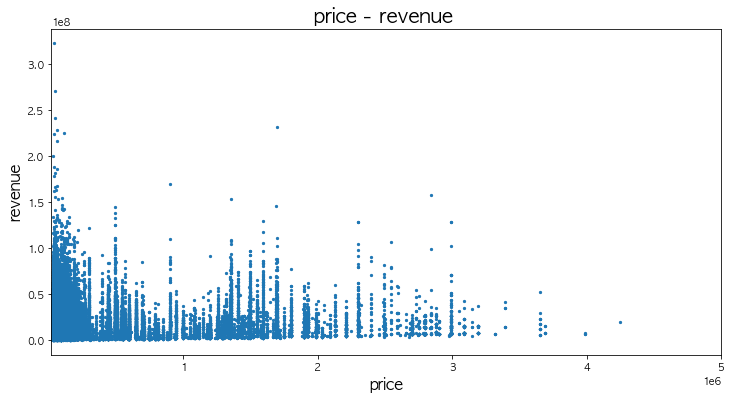

In [75]:
### 가격(price)과 매출(revenue)의 관계 ###
# 낮은 가격의 상품이 더 많음.
# 낮은 가격대의 상품에서 높은 매출을 기록한 경우가 더 많음.

plt.figure(figsize=(12, 6))

plt.scatter(maindata['price'], maindata['revenue'], s=5)
plt.title("price - revenue ", fontsize=20)
plt.xlim(20000,5000000)
plt.xlabel("price",fontsize=16) 
plt.ylabel("revenue", fontsize=16) 
plt.show()

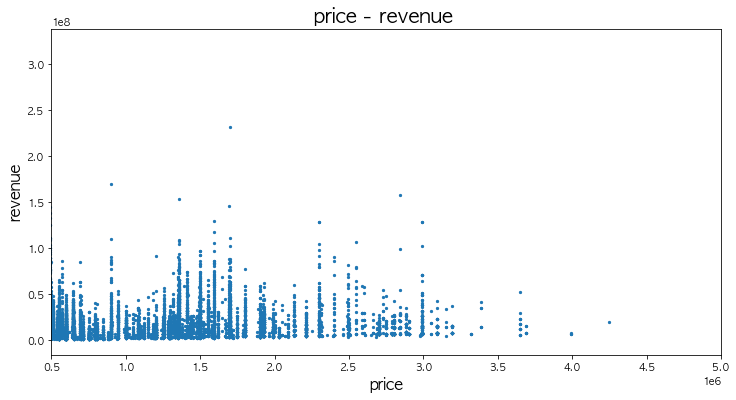

In [71]:
plt.figure(figsize=(12, 6))

plt.scatter(maindata['price'], maindata['revenue'], s=5)
plt.title("price - revenue ", fontsize=20)
plt.xlim(500000,5000000)
plt.xlabel("price",fontsize=16) 
plt.ylabel("revenue", fontsize=16) 
plt.show()

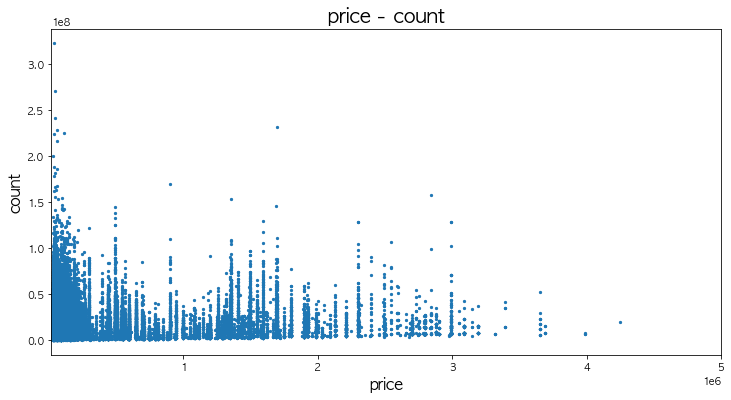

In [76]:
### 가격(price)과 구매수량(count)의 관계 ###
# 낮은 가격일수록 더 많이 구매함.

plt.figure(figsize=(12, 6))

plt.scatter(maindata['price'], maindata['revenue'], s= 5)
plt.title("price - count", fontsize=20)
plt.xlim(20000,5000000)
plt.xlabel("price",fontsize=16) 
plt.ylabel("count", fontsize=16) 
plt.show()

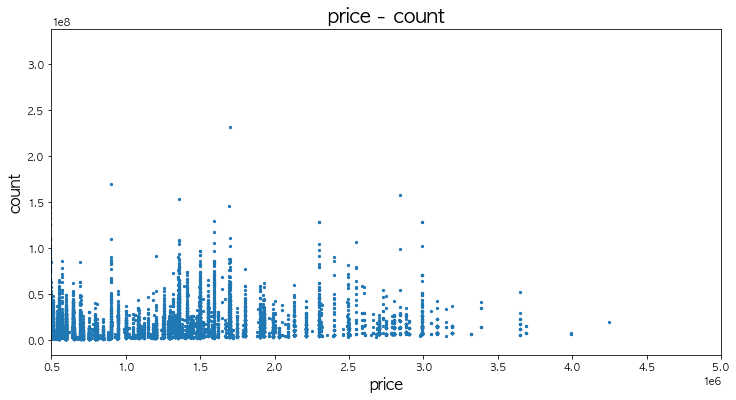

In [74]:
plt.figure(figsize=(12, 6))

plt.scatter(maindata['price'], maindata['revenue'], s= 5)
plt.title("price - count", fontsize=20)
plt.xlim(500000,5000000)
plt.xlabel("price",fontsize=16) 
plt.ylabel("count", fontsize=16) 
plt.show()

<AxesSubplot:xlabel='dayofweek', ylabel='revenue'>

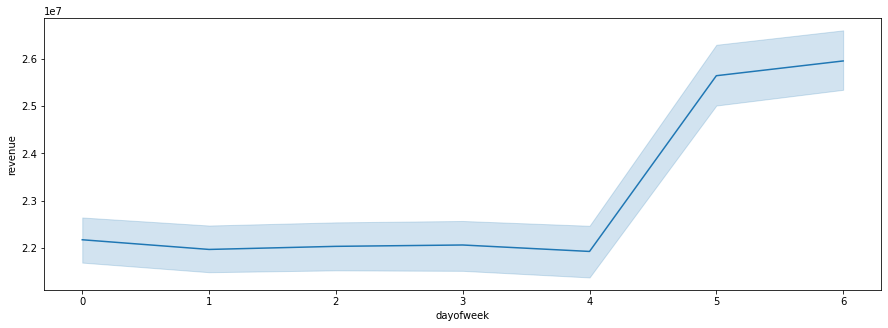

In [59]:
### 요일(dayofweek)과 매출(revenue)의 관계 ###
# 주말(5,6)에 확연히 높은 매출을 보임.
# 요일보다는 평일-주말로 범주화 하는 것이 좋을 것으로 예상됨.

plt.figure(figsize=(15,5))
sns.lineplot(data = maindata, x = 'dayofweek', y = 'revenue')

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

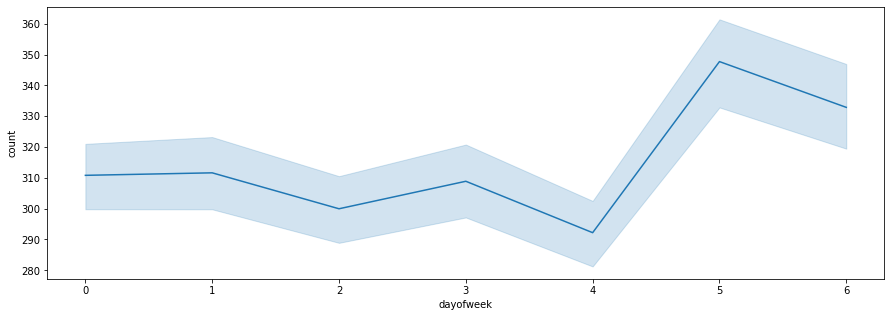

In [60]:
### 요일(price)과 구매수량(count)의 관계 ###
# 역시 주말(5,6)에 더 많이 팔림.

plt.figure(figsize=(15,5))
sns.lineplot(data = maindata, x = 'dayofweek', y = 'count')

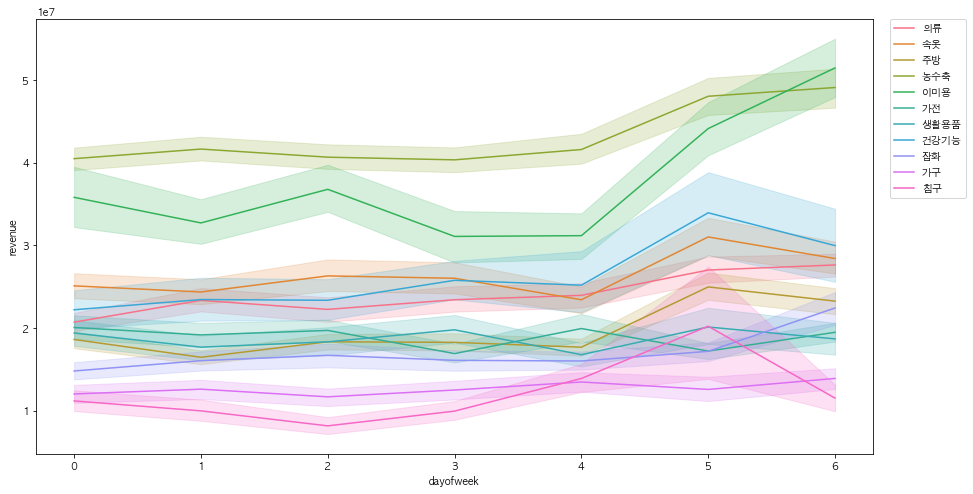

In [31]:
### 요일과 매출의 관계(카테고리별)###
# 평일과 주말의 매출 차이가 큰 카테고리는 이미용, 생활용품, 건강기능, 속옷, 주방, 침구

plt.figure(figsize=(15,8))
sns.lineplot(data = maindata, x = 'dayofweek', y = 'revenue', hue = 'category')
plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.

Text(0.5, 1.0, '월별 평균 매출액 추이')

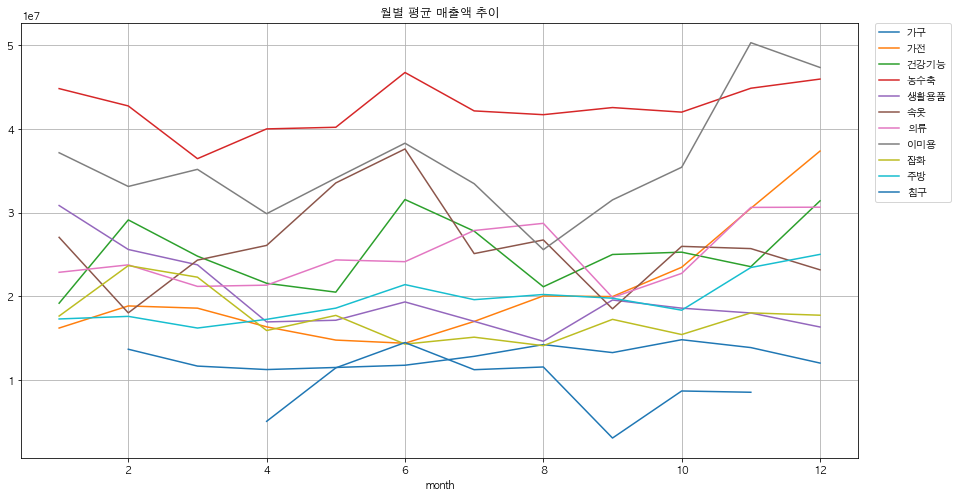

In [32]:
### 월별 평균 매출액 추이(카테고리별) ###
# 12월로 갈수록 뚜렷하게 평균 매출이 높은 카테고리는 이미용, 가전.
# 6월에 평균 매출이 높으 카테고리는 속옷, 침구.
# 1년치 데이터 밖에 없어서 계절에 의한 변화인지, 상품의 변화에 의한 성과인지 판단하기 어려움.

month_category_mean = maindata["revenue"].groupby([maindata["month"], maindata["category"]]).mean().unstack("category")
month_category_mean.plot(figsize=(15,8), grid = True);
plt.legend(bbox_to_anchor =(1.02,1), loc = 2, borderaxespad=0) # 범례를 밖으로 출력.
plt.title("월별 평균 매출액 추이")

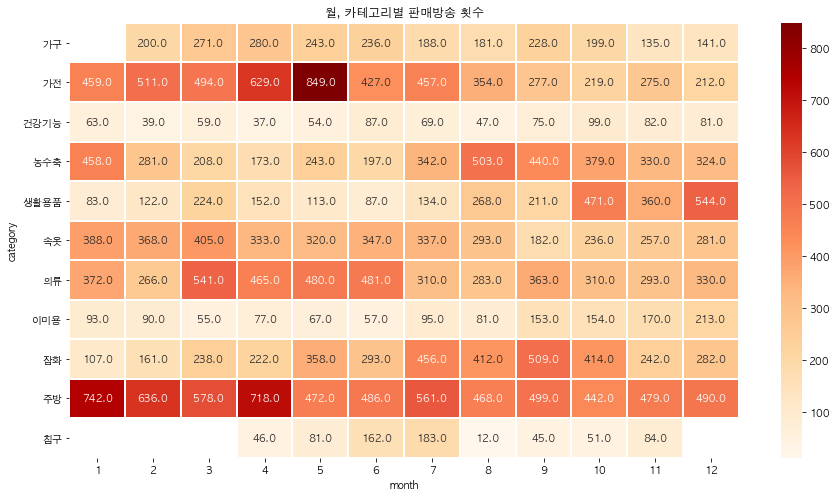

In [33]:
### 월, 카테고리별 별 판매방송 횟수 ###
# "가전" 5월에 가전제품의 판매 횟수가 아주 높았음. 이후 횟수는 줄였으나 방송당 평균 매출은 증가함. 
# "농수축" 꾸준히 평균 매출이 상승하는 카테고리로 지속적으로 판매 횟수도 증가하는 것을 볼 수 있음.
# "주방" 용품의 판매횟수를 꾸준히 줄여옴. 

month_category_df = maindata.groupby(['month','category']).count()
month_category_df = month_category_df['name']
month_category_df = month_category_df.reset_index()

month_category_heat = month_category_df.pivot(index = 'category', columns ='month' , values = 'name') 

plt.figure(figsize=(15,8))
plt.title("월, 카테고리별 판매방송 횟수")
sns.heatmap(month_category_heat, annot=True, fmt="", linewidths=1, cmap="OrRd")
plt.show()

<AxesSubplot:title={'center':'시간(time)별 매출의 box 플롯'}, xlabel='time', ylabel='revenue'>

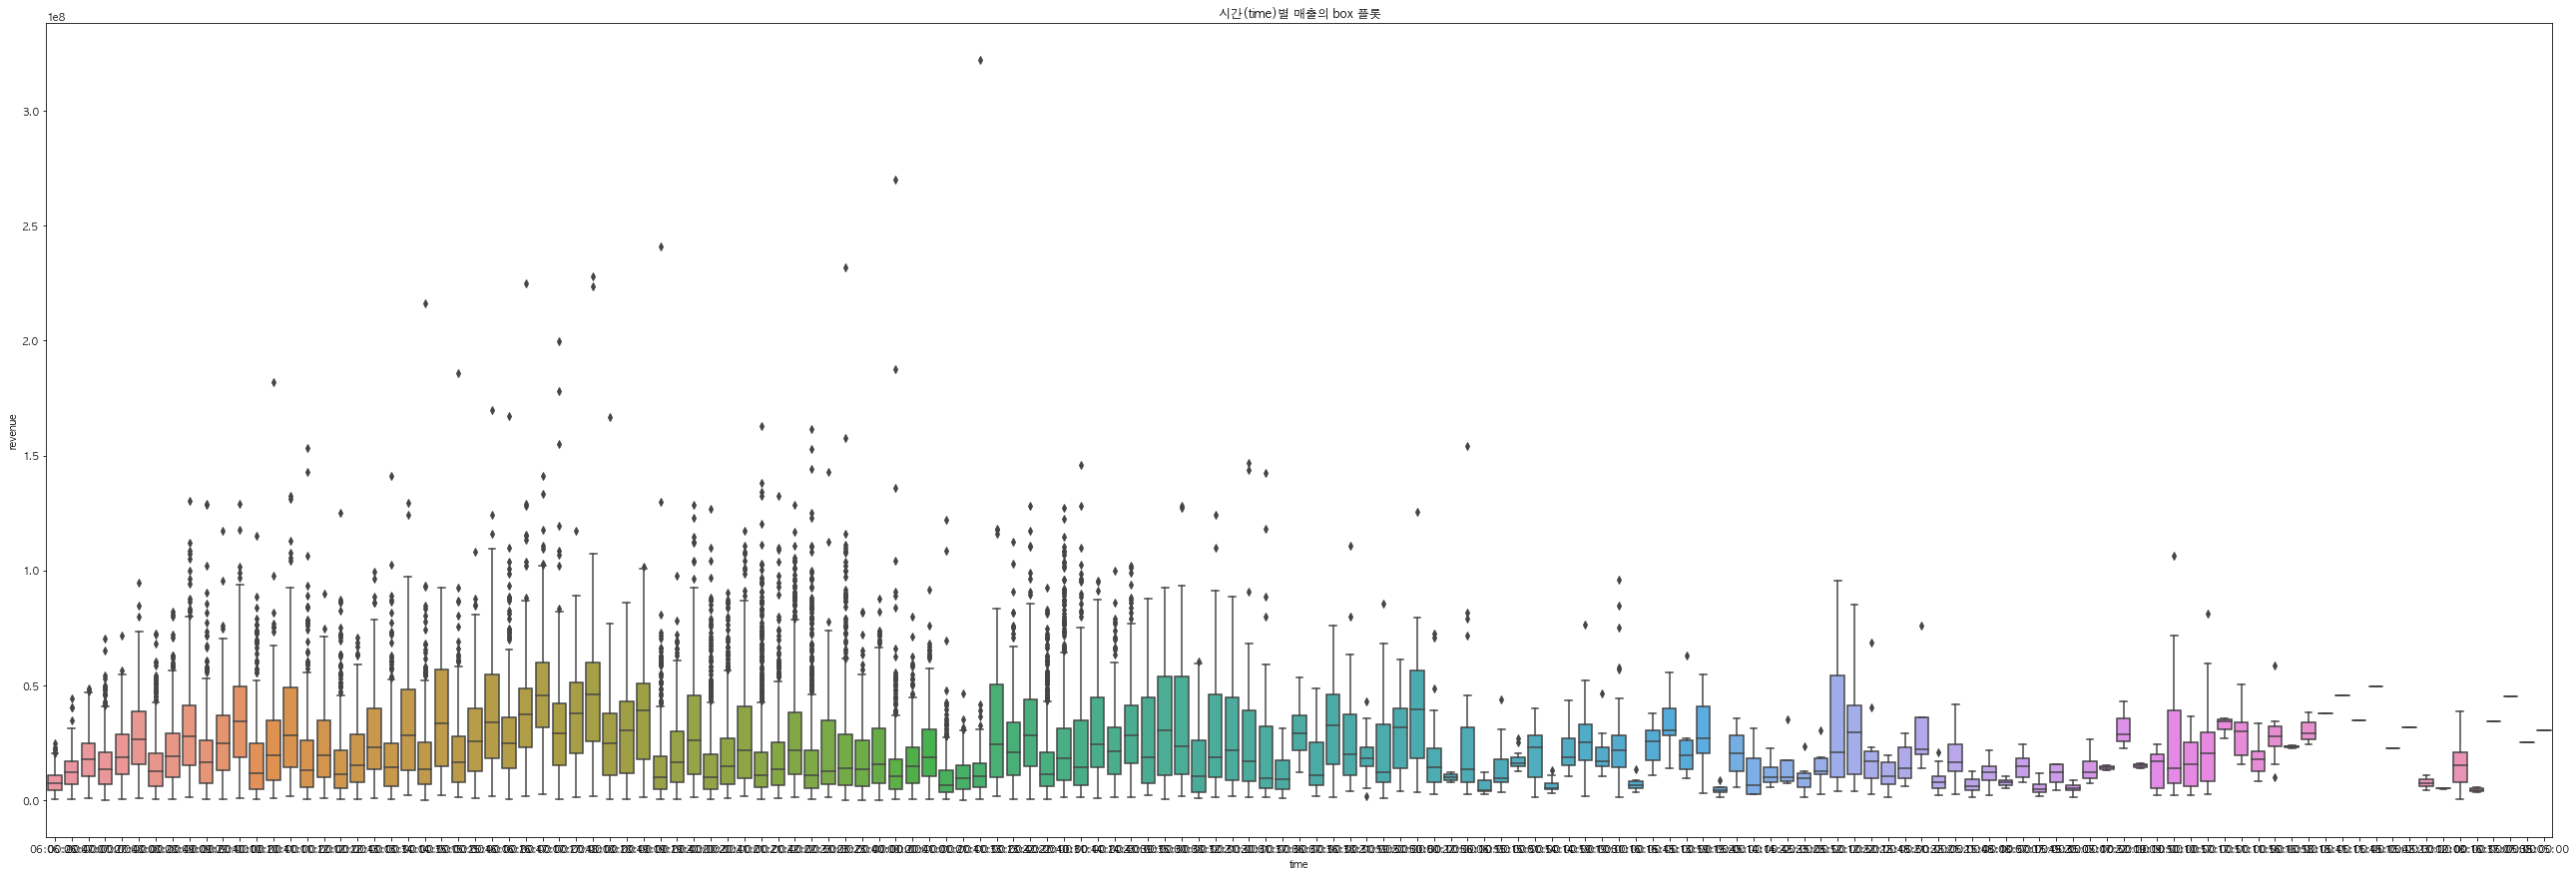

In [34]:
### 시간(time)별 매출의 box 플롯 ###
# 보통 방송을 20분씩 3번함으로 6:00, 6:20, 6:40은 같은 상품에 대한 반복된 방송이다. 
# 아래 그래프(앞부분)로 보아, 방송이 반복을 거듭할수록 매출이 높아진다. 
# -> repeat 변수를 추가해 같은 시간대 몇 번째 반복되는 방송인지 구분해주었다.
# 12시 이후로는 그런 경향성이 적어보이는데, 30분씩 2번 방송하는 상품, 10분씩 6번 방송하는 상품들이 오후에 많이 배치되어있기 때문이다.

maindata['time'] = pd.to_datetime(maindata['datetime']).dt.time
plt.figure(figsize=(45,15))
plt.title("시간(time)별 매출의 box 플롯")
sns.boxplot(data = maindata, x = 'time', y = 'revenue')

<AxesSubplot:title={'center':'시간(hour)대별 매출의 box 플롯'}, xlabel='hour', ylabel='revenue'>

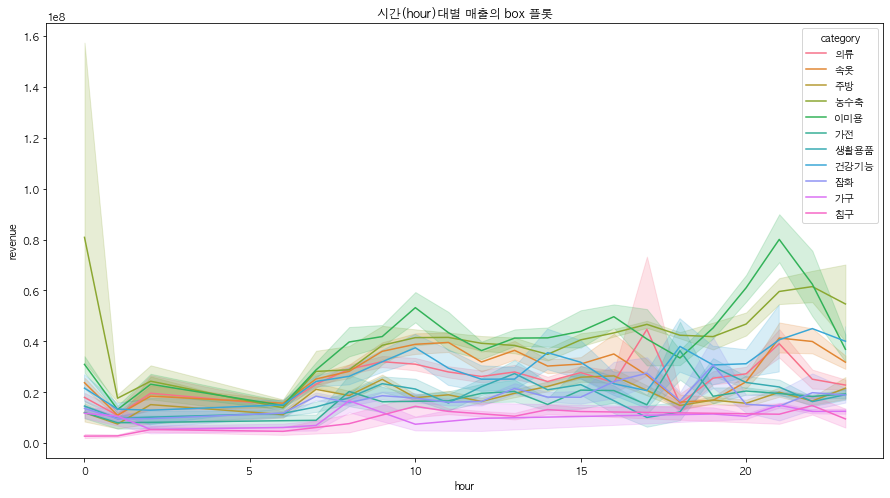

In [35]:
### 시간(hour)대, 카테고리(category)별 매출의 변화 ###

plt.figure(figsize=(15,8))
plt.title("시간(hour)대별 매출의 box 플롯")
sns.lineplot(data = maindata, x = 'hour', y = 'revenue', hue ='category')

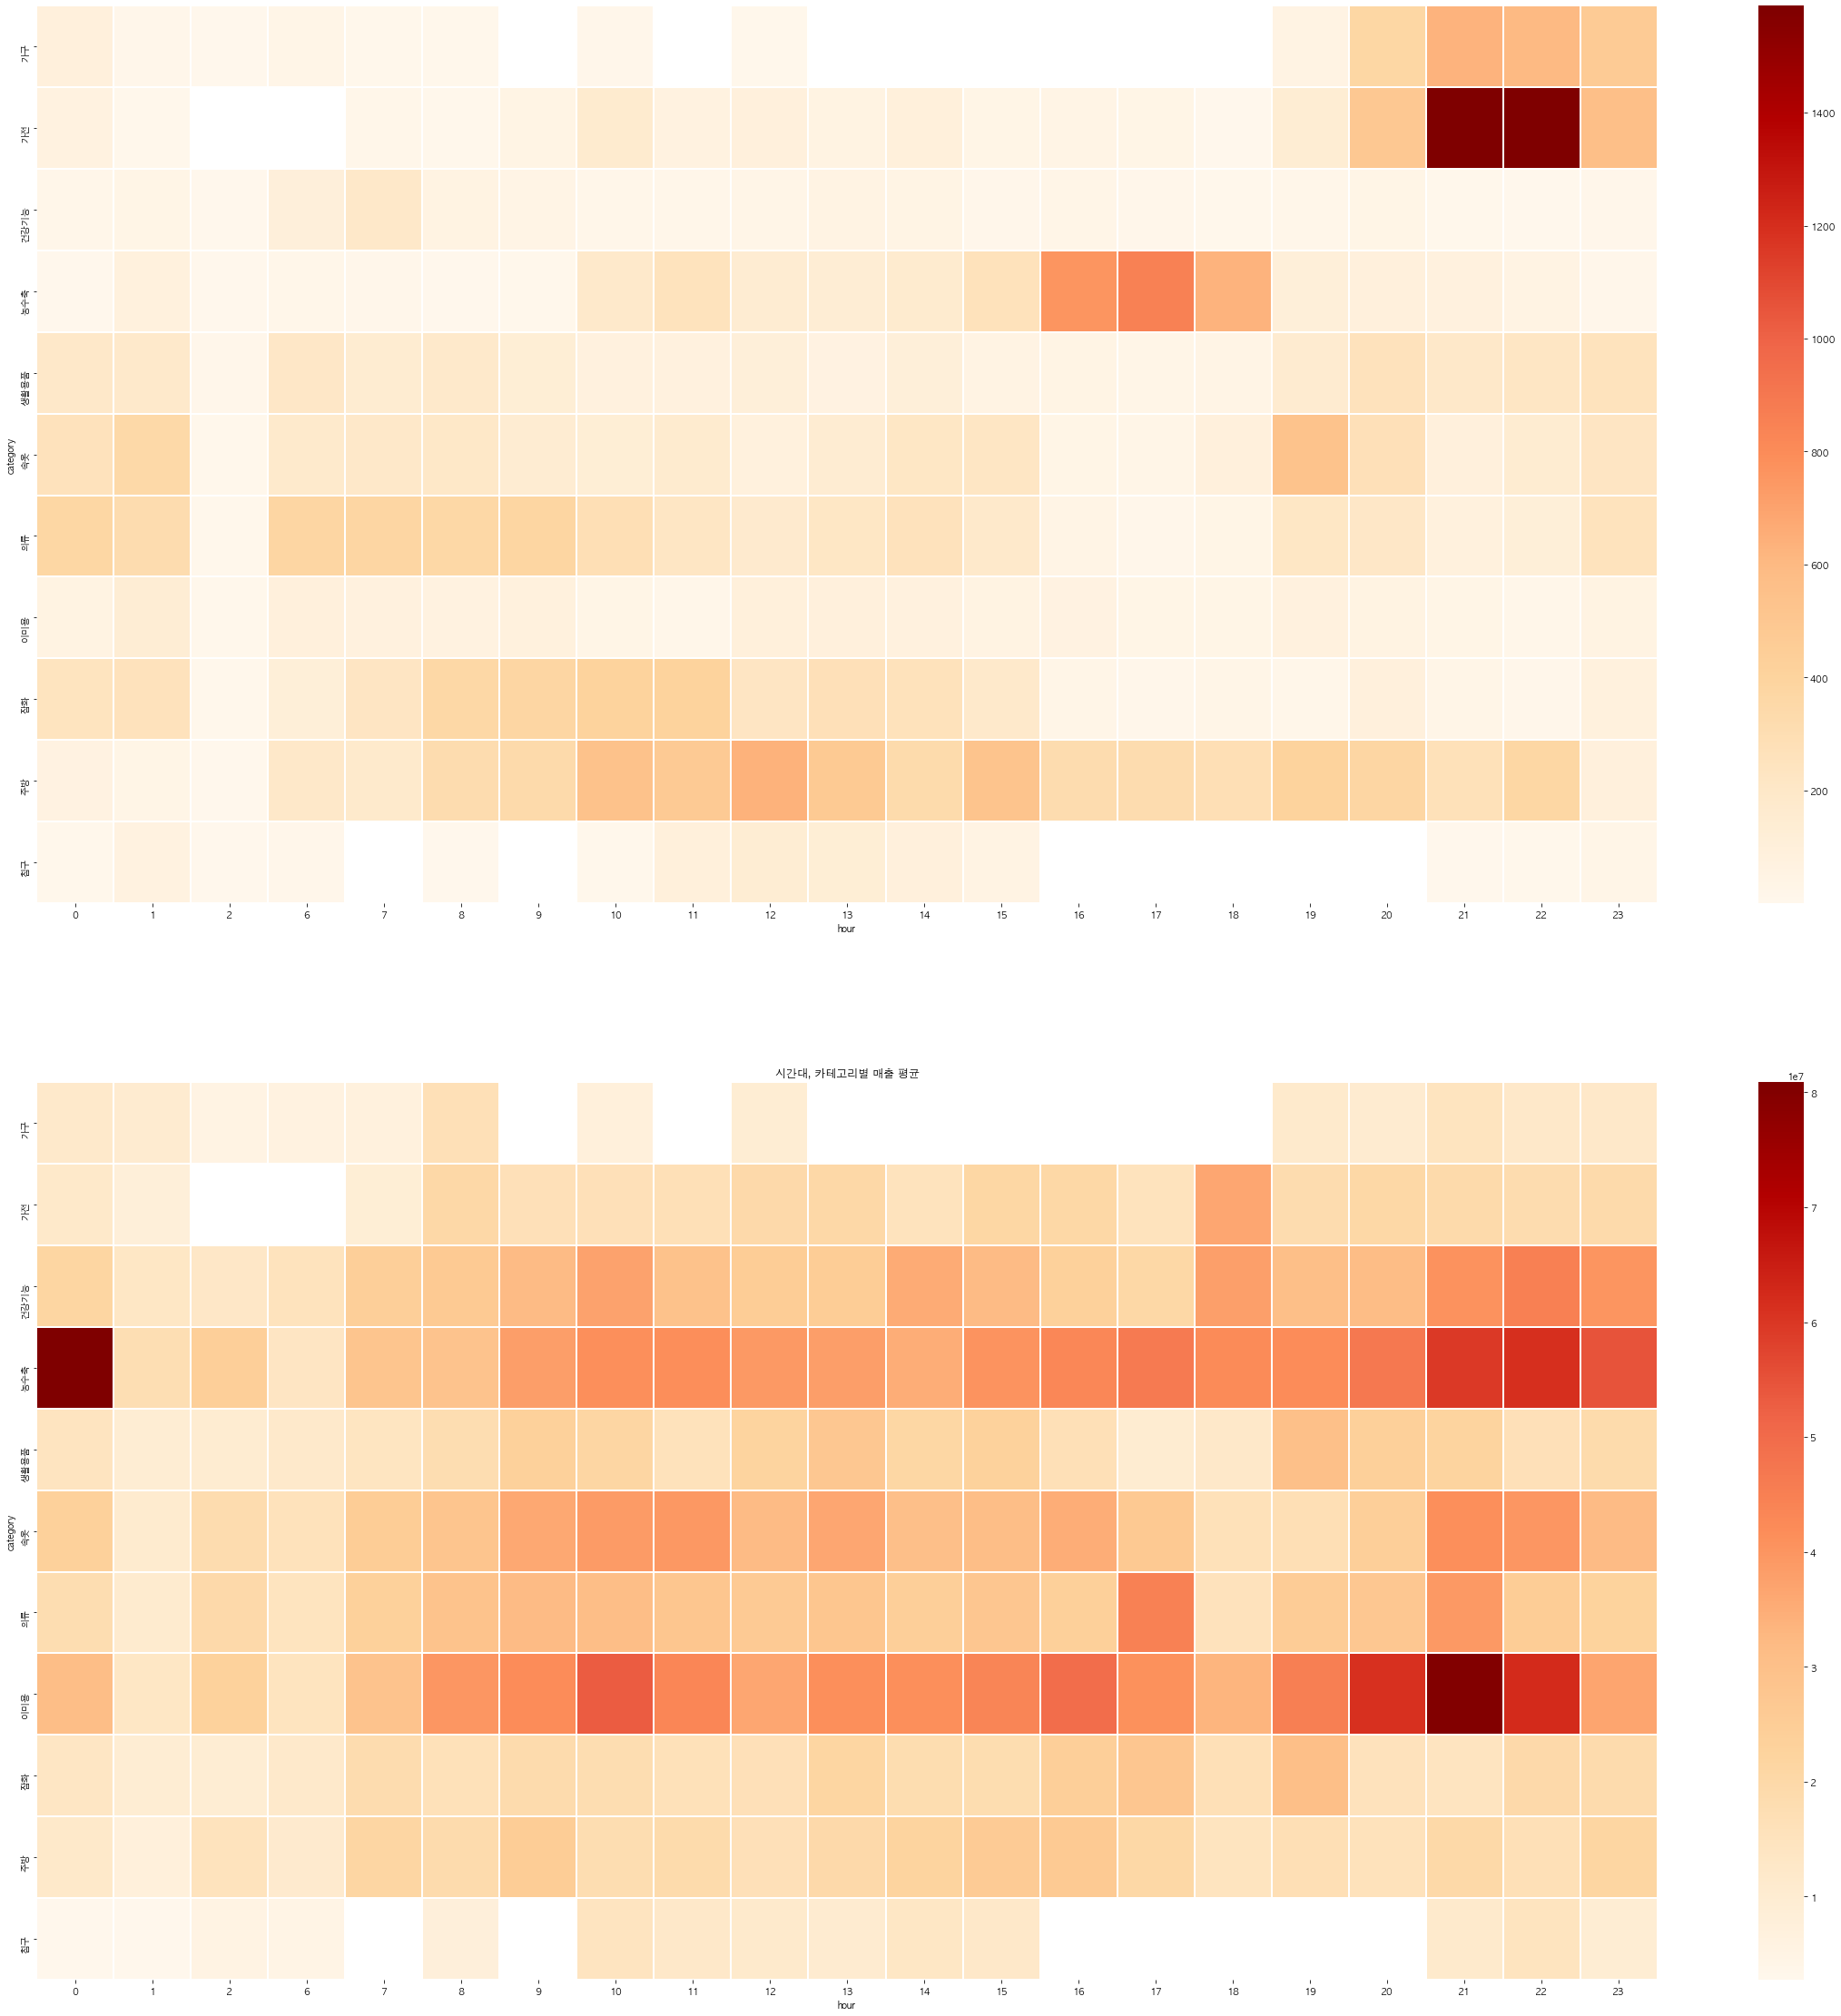

In [36]:
### 1) 시간대, 카테고리별 상품 방송 횟수 ###
# 시간대별 nsshop+에서 선호하는 카테고리를 알 수 있음.
# 오전시간에는 주로 의류, 잡화, 오후시간에는 농수출, 주방, 저녁시간에는 가구, 가전, 생활용품을 배치

fig = plt.figure(figsize = (40,40)) # width x height
ax1 = fig.add_subplot(2, 1, 1) # row, column, position
ax2 = fig.add_subplot(2, 1, 2)

hour_category_df = maindata.groupby(['hour','category']).count()['name']
hour_category_df = hour_category_df.reset_index()
hour_category_heat = hour_category_df.pivot(index = 'category', columns ='hour' , values = 'name') 

sns.heatmap(hour_category_heat, ax=ax1, annot=False, fmt="", linewidths=1, cmap="OrRd")
ax1 = plt.title("시간대, 카테고리별 상품의 방송 횟수")


### 2) 시간대, 카테고리별 매출의 평균 ###
# 

hour_category_df1 = maindata.groupby(['hour','category']).mean()['revenue']
hour_category_df1 = hour_category_df1.reset_index()
hour_category_heat1 = hour_category_df1.pivot(index = 'category', columns ='hour' , values = 'revenue') 

sns.heatmap(hour_category_heat1, ax=ax2, annot=False, fmt="", linewidths=1, cmap="OrRd")
ax2 = plt.title("시간대, 카테고리별 매출 평균")
plt.show()

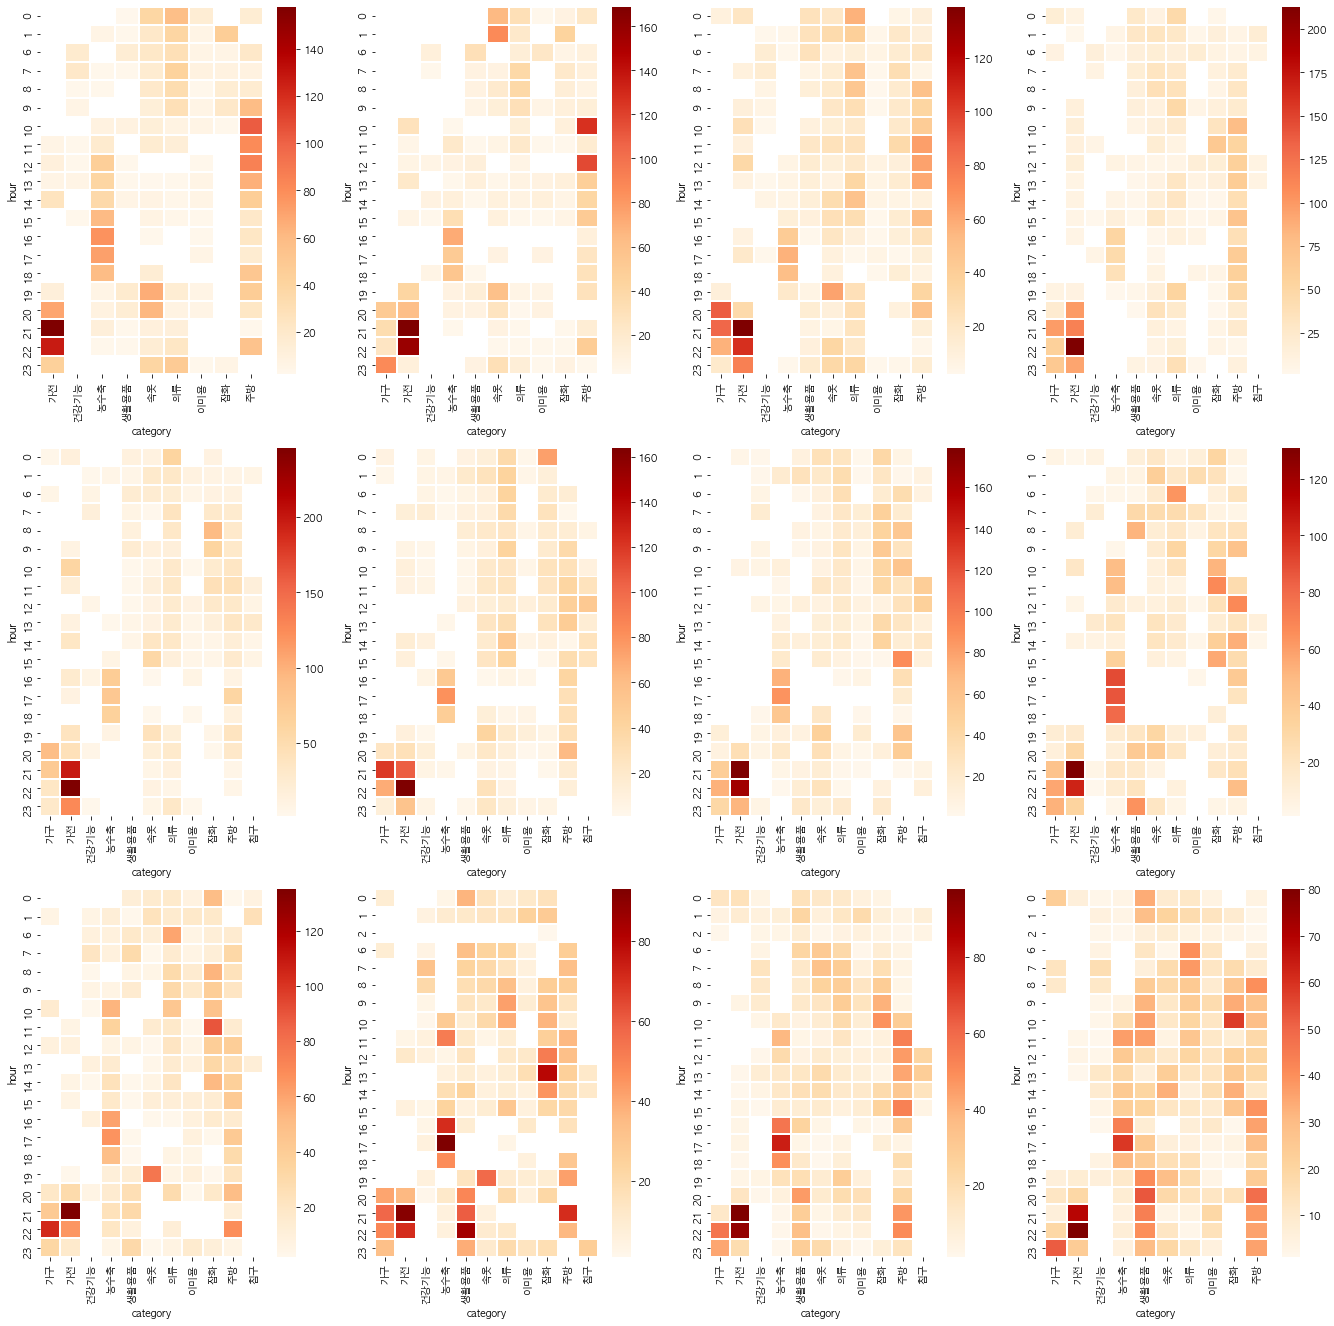

In [37]:
### 1월~12월 시간대, 카테고리별 매출의 Heatmap ###

hour_category_heat = maindata.groupby(['hour','category','month']).count()['name'].reset_index()

hour_category_heat1 = hour_category_heat[hour_category_heat["month"] == 1]
hour_category_heat1 = hour_category_heat1.pivot(index = 'hour', columns ='category' , values = 'name') 

hour_category_heat2 = hour_category_heat[hour_category_heat["month"] == 2]
hour_category_heat2 = hour_category_heat2.pivot(index = 'hour', columns ='category' , values = 'name') 

hour_category_heat3 = hour_category_heat[hour_category_heat["month"] == 3]
hour_category_heat3 = hour_category_heat3.pivot(index = 'hour', columns ='category' , values = 'name') 

hour_category_heat4 = hour_category_heat[hour_category_heat["month"] == 4]
hour_category_heat4 = hour_category_heat4.pivot(index = 'hour', columns ='category' , values = 'name') 

hour_category_heat5 = hour_category_heat[hour_category_heat["month"] == 5]
hour_category_heat5 = hour_category_heat5.pivot(index = 'hour', columns ='category' , values = 'name') 

hour_category_heat6 = hour_category_heat[hour_category_heat["month"] == 6]
hour_category_heat6 = hour_category_heat6.pivot(index = 'hour', columns ='category' , values = 'name') 

hour_category_heat7 = hour_category_heat[hour_category_heat["month"] == 7]
hour_category_heat7 = hour_category_heat7.pivot(index = 'hour', columns ='category' , values = 'name') 

hour_category_heat8 = hour_category_heat[hour_category_heat["month"] == 8]
hour_category_heat8 = hour_category_heat8.pivot(index = 'hour', columns ='category' , values = 'name') 

hour_category_heat9 = hour_category_heat[hour_category_heat["month"] == 9]
hour_category_heat9 = hour_category_heat9.pivot(index = 'hour', columns ='category' , values = 'name') 

hour_category_heat10 = hour_category_heat[hour_category_heat["month"] == 10]
hour_category_heat10 = hour_category_heat10.pivot(index = 'hour', columns ='category' , values = 'name') 

hour_category_heat11 = hour_category_heat[hour_category_heat["month"] == 11]
hour_category_heat11 = hour_category_heat11.pivot(index = 'hour', columns ='category' , values = 'name') 

hour_category_heat12 = hour_category_heat[hour_category_heat["month"] == 12]
hour_category_heat12 = hour_category_heat12.pivot(index = 'hour', columns ='category' , values = 'name') 


fig = plt.figure(figsize = (23,23)) # width x height
ax1 = fig.add_subplot(3, 4, 1) # row, column, position
ax2 = fig.add_subplot(3, 4, 2)
ax3 = fig.add_subplot(3, 4, 3)
ax4 = fig.add_subplot(3, 4, 4)
ax5 = fig.add_subplot(3, 4, 5)
ax6 = fig.add_subplot(3, 4, 6)
ax7 = fig.add_subplot(3, 4, 7)
ax8 = fig.add_subplot(3, 4, 8)
ax9 = fig.add_subplot(3, 4, 9)
ax10 = fig.add_subplot(3, 4, 10)
ax11 = fig.add_subplot(3, 4, 11)
ax12 = fig.add_subplot(3, 4, 12)

#plt.figure(figsize=(18,10))
sns.heatmap(hour_category_heat1, ax=ax1, annot=False, fmt="", linewidths=1, cmap="OrRd")
sns.heatmap(hour_category_heat2, ax=ax2, annot=False, fmt="", linewidths=1, cmap="OrRd")
sns.heatmap(hour_category_heat3, ax=ax3, annot=False, fmt="", linewidths=1, cmap="OrRd")
sns.heatmap(hour_category_heat4, ax=ax4, annot=False, fmt="", linewidths=1, cmap="OrRd")
sns.heatmap(hour_category_heat5, ax=ax5, annot=False, fmt="", linewidths=1, cmap="OrRd")
sns.heatmap(hour_category_heat6, ax=ax6, annot=False, fmt="", linewidths=1, cmap="OrRd")
sns.heatmap(hour_category_heat7, ax=ax7, annot=False, fmt="", linewidths=1, cmap="OrRd")
sns.heatmap(hour_category_heat8, ax=ax8, annot=False, fmt="", linewidths=1, cmap="OrRd")
sns.heatmap(hour_category_heat9, ax=ax9, annot=False, fmt="", linewidths=1, cmap="OrRd")
sns.heatmap(hour_category_heat10, ax=ax10, annot=False, fmt="", linewidths=1, cmap="OrRd")
sns.heatmap(hour_category_heat11, ax=ax11, annot=False, fmt="", linewidths=1, cmap="OrRd")
sns.heatmap(hour_category_heat12, ax=ax12, annot=False, fmt="", linewidths=1, cmap="OrRd")
plt.show()

<AxesSubplot:title={'center':'평일과 휴일의 시간대별 매출 추이'}, xlabel='hour', ylabel='revenue'>

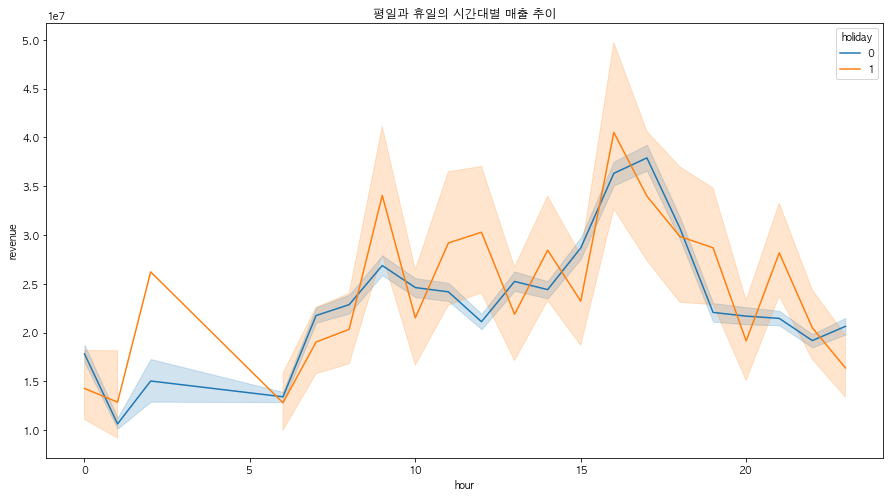

In [38]:
### 평일과 휴일의 시간대별 매출 추이 ###
# 평일에 비해 휴일 데이터가 적기때문에 분산이 더 크다. 
# 하지만 평균매출은 대체적으로 훨씬 크거나, 살짝 작거나한 것으로 보인다. 

plt.figure(figsize=(15,8))
plt.title("평일과 휴일의 시간대별 매출 추이")
sns.lineplot(data = maindata, x='hour', y='revenue', hue='holiday')

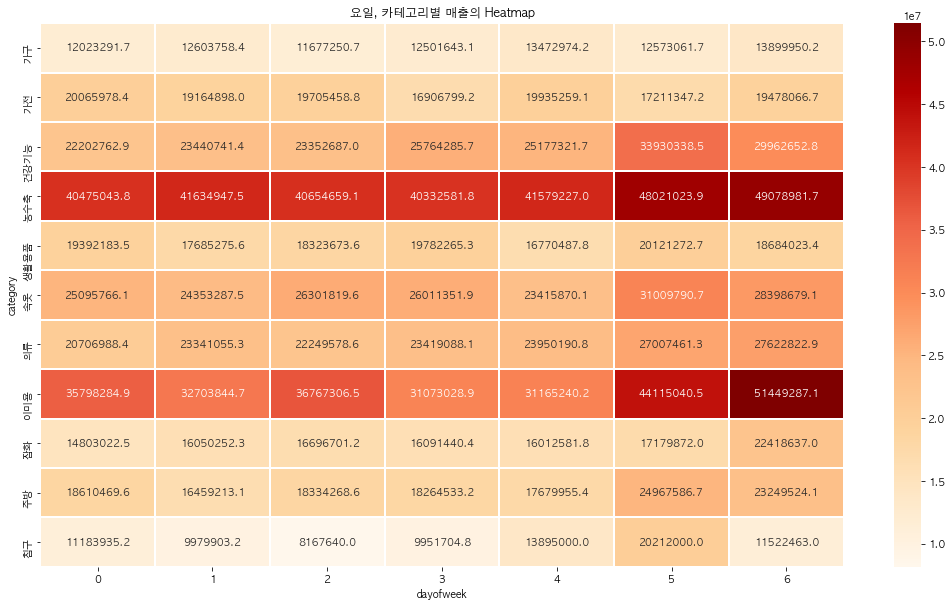

In [39]:
### 요일(dayofweek)-카테고리(category)별 평균 매출의 heatmap ###

dayofweek_category_heat = maindata.groupby(["dayofweek", "category"]).mean()['revenue'].round(1).reset_index()
dayofweek_category_heat = dayofweek_category_heat.pivot(index = 'category', columns ='dayofweek' , values = 'revenue') 

plt.figure(figsize=(18,10))
plt.title("요일, 카테고리별 매출의 Heatmap")
sns.heatmap(dayofweek_category_heat, annot=True, fmt="", linewidths=1, cmap="OrRd")
plt.show()

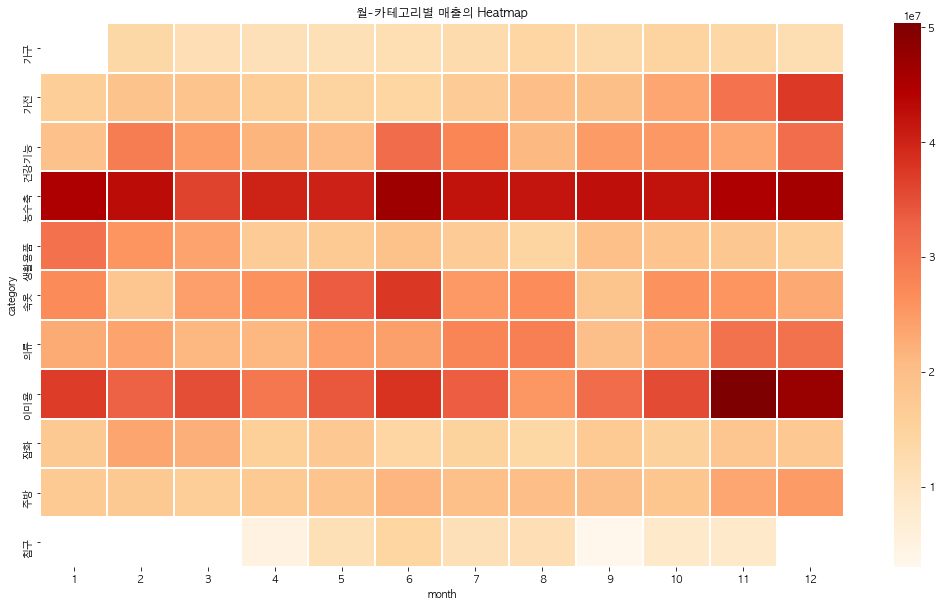

In [40]:
### 월(month)-카테고리(category)별 평균 매출의 heatmap ###
# 붉은 색이 짙어질수록 매출액이 높다.
# 농수축, 이미용이 대체로 매출이 높고 1시, 6시, 11,12시가 프라임타임(매출이 높은 시간대)으로 보인다.

month_category_heat = maindata.groupby(["month", "category"]).mean()['revenue'].round(1).reset_index()
month_category_heat = month_category_heat.pivot(index = 'category', columns ='month' , values = 'revenue') 

plt.figure(figsize=(18,10))
plt.title("월-카테고리별 매출의 Heatmap")
sns.heatmap(month_category_heat, annot=False, fmt="", linewidths=1, cmap="OrRd")
plt.show()

<AxesSubplot:xlabel='mother_code', ylabel='revenue'>

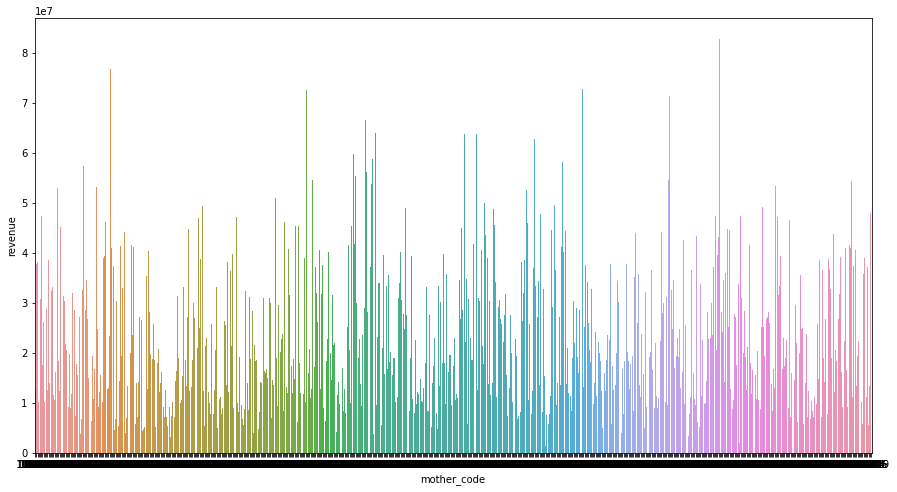

In [71]:
### 머더코드(mother_code) 별 평균 매출액 ###
# 머더코드별로 아주 큰 차이가 있음
mother_code_mean_revenue = maindata.groupby(maindata['mother_code'])['revenue'].mean()
mother_code_df = mother_code_mean_revenue.reset_index()

plt.figure(figsize=(15,8))
sns.barplot(data = mother_code_df, x='mother_code', y='revenue')


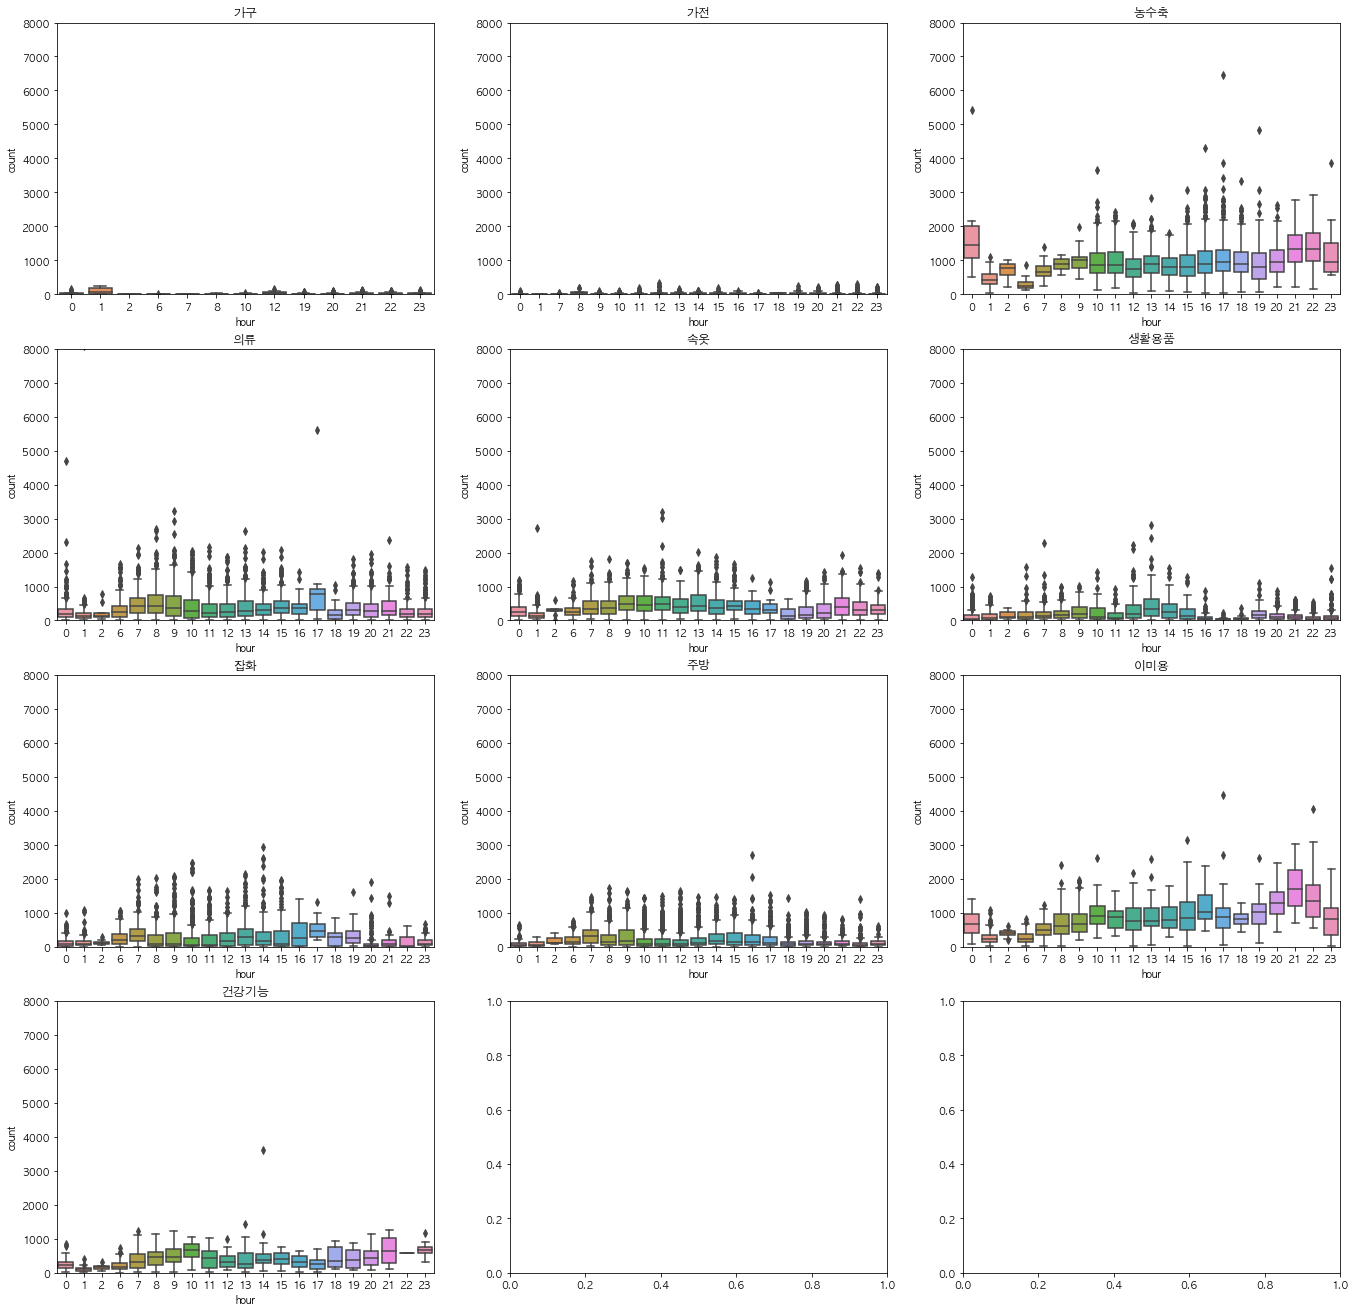

In [41]:
### 카테고리(category) - 시간대(hour) 별 구매수량 ###
# '머더코드(mother_code)'보다 범위가 넓은 '카테고리(category)'끼리 비교해봐도 구매수량 값, 분포, 
# 프라임시간대(매출이 높은 시간대)가 상이한 것으로 보임. 

fig = plt.figure(figsize = (23,23)) # width x height
ax1 = fig.add_subplot(4, 3, 1) # row, column, position
ax2 = fig.add_subplot(4, 3, 2)
ax3 = fig.add_subplot(4, 3, 3)
ax4 = fig.add_subplot(4, 3, 4)
ax5 = fig.add_subplot(4, 3, 5)
ax6 = fig.add_subplot(4, 3, 6)
ax7 = fig.add_subplot(4, 3, 7)
ax8 = fig.add_subplot(4, 3, 8)
ax9 = fig.add_subplot(4, 3, 9)
ax10 = fig.add_subplot(4, 3, 10)
ax11 = fig.add_subplot(4, 3, 11)
ax12 = fig.add_subplot(4, 3, 12)

ax1.set(ylim=(0, 8000))
ax2.set(ylim=(0, 8000))
ax3.set(ylim=(0, 8000))
ax4.set(ylim=(0, 8000))
ax5.set(ylim=(0, 8000))
ax6.set(ylim=(0, 8000))
ax7.set(ylim=(0, 8000))
ax8.set(ylim=(0, 8000))
ax9.set(ylim=(0, 8000))
ax10.set(ylim=(0, 8000))

sns.boxplot(data = maindata[maindata["category"]=="가구"], x = 'hour', y = 'count', ax=ax1)
sns.boxplot(data = maindata[maindata["category"]=="가전"], x = 'hour', y = 'count', ax=ax2)
sns.boxplot(data = maindata[maindata["category"]=="농수축"], x = 'hour', y = 'count', ax=ax3)
sns.boxplot(data = maindata[maindata["category"]=="의류"], x = 'hour', y = 'count', ax=ax4)
sns.boxplot(data = maindata[maindata["category"]=="속옷"], x = 'hour', y = 'count', ax=ax5)
sns.boxplot(data = maindata[maindata["category"]=="생활용품"], x = 'hour', y = 'count', ax=ax6)
sns.boxplot(data = maindata[maindata["category"]=="잡화"], x = 'hour', y = 'count', ax=ax7)
sns.boxplot(data = maindata[maindata["category"]=="주방"], x = 'hour', y = 'count', ax=ax8)
sns.boxplot(data = maindata[maindata["category"]=="이미용"], x = 'hour', y = 'count', ax=ax9)
sns.boxplot(data = maindata[maindata["category"]=="건강기능"], x = 'hour', y = 'count', ax=ax10)

ax1.title.set_text('가구')
ax2.title.set_text('가전')
ax3.title.set_text('농수축')
ax4.title.set_text('의류')
ax5.title.set_text('속옷')
ax6.title.set_text('생활용품')
ax7.title.set_text('잡화')
ax8.title.set_text('주방')
ax9.title.set_text('이미용')
ax10.title.set_text('건강기능')

plt.show()

C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backe

<AxesSubplot:title={'center':'머더코드, 시간별 매출의 Heatmap'}, xlabel='hour', ylabel='mother_code'>

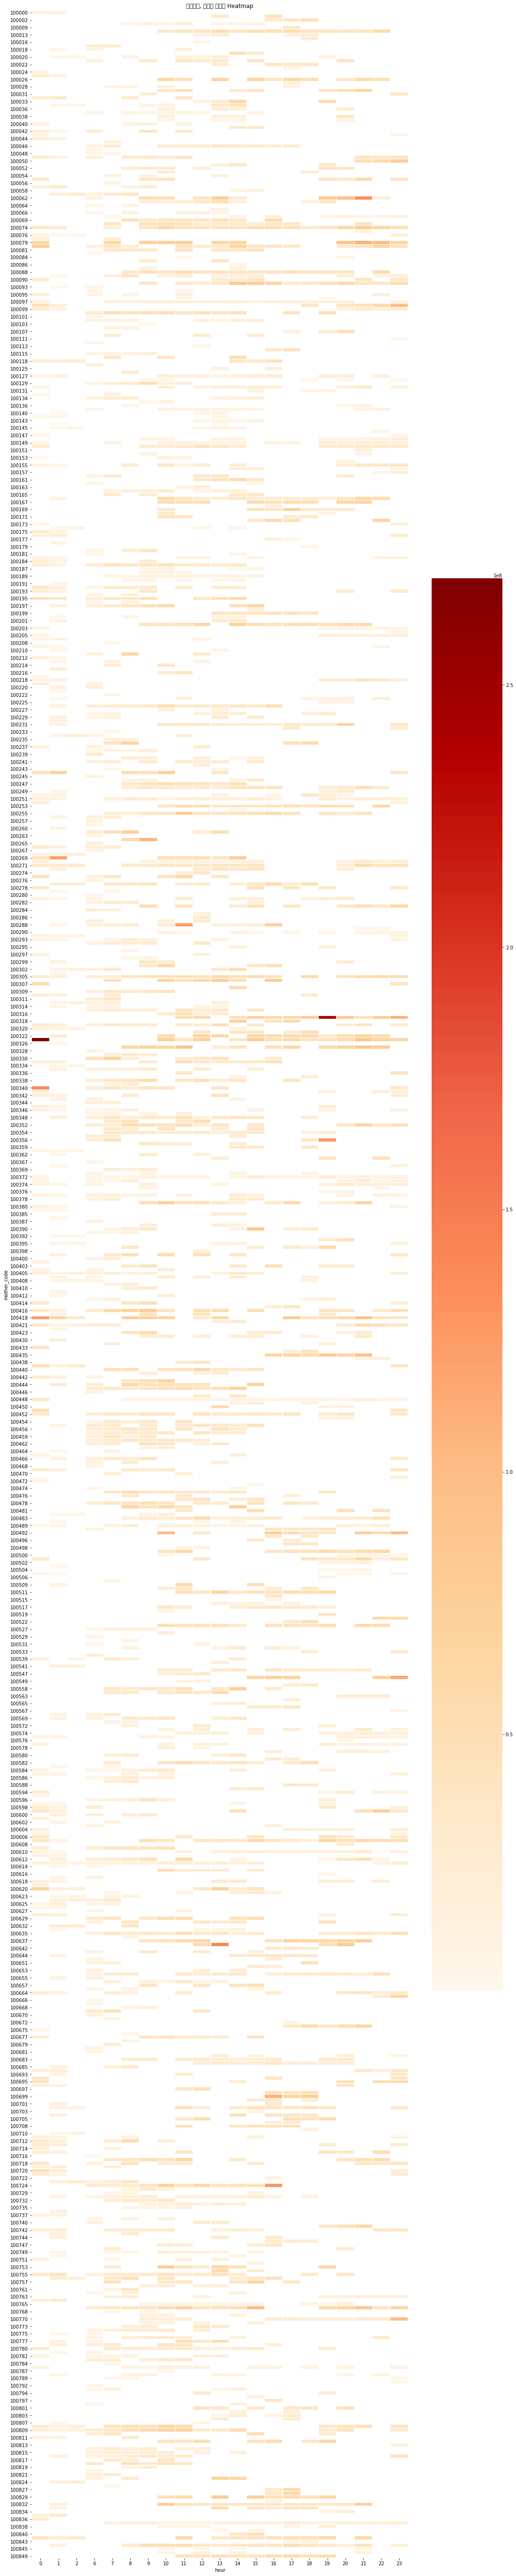

In [73]:
### 머더코드-시간대별 평균 매출의 heatmap ###
# 색이 붉을수록 평균 매출이 높음.
# 몇몇의 붉은 머더코드는 이상치로 예상됨.(홈쇼핑 대박난 상품)

mothercode_hour_heat = maindata.groupby(["mother_code", "hour"]).mean()['revenue'].round(1).reset_index()
mothercode_hour_heat = mothercode_hour_heat.pivot(index = 'mother_code', columns ='hour' , values = 'revenue') 

plt.figure(figsize=(18,100))
plt.title("머더코드, 시간별 매출의 Heatmap")
sns.heatmap(mothercode_hour_heat, annot=False, fmt="", linewidths=0.1, cmap="OrRd")

C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\

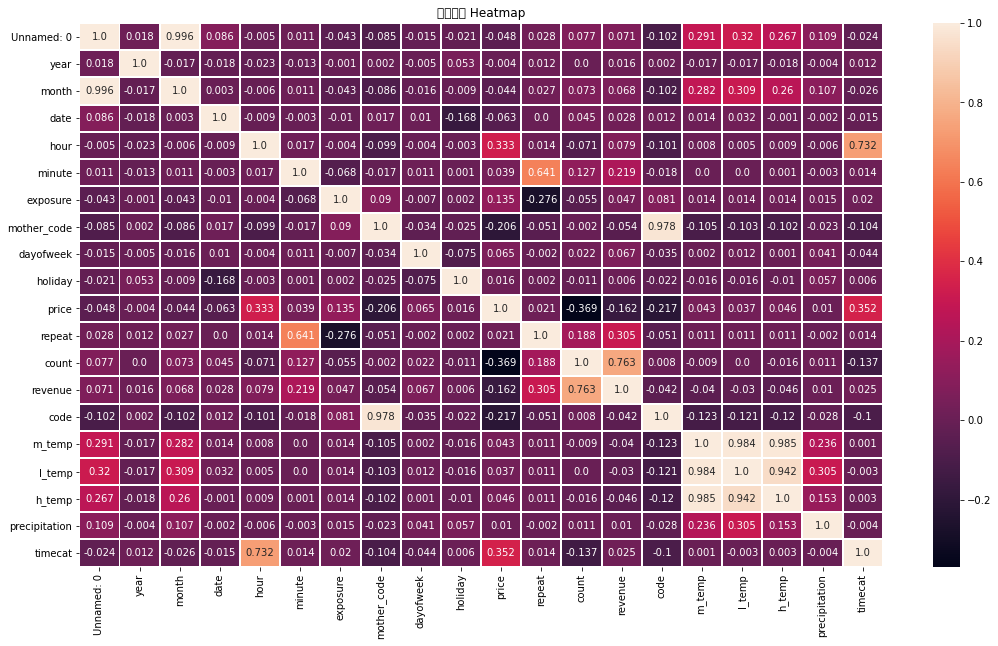

In [74]:
### maindata의 numeric한 변수끼리의 상관계수 ###
# count/revenue 와 가장 큰 선형상관을 보이는 변수는 price, repeat(minute과 겹치는 feature)임 
# 이는 앞서 시각화한 그래프에서도 확인할 수 있음

maindata_corr = maindata.corr().round(3)

plt.figure(figsize=(18,10))
plt.title("상관관계 Heatmap")
sns.heatmap(maindata_corr, annot=True, fmt="", linewidths=1)
plt.show()

### 2) 날씨 데이터 분석
결론 :
- 여러가지로 시도해보았으나 관계성을 찾기가 어려웠음.
- 최종 모델링에서 제외함.

<AxesSubplot:xlabel='m_temp', ylabel='revenue'>

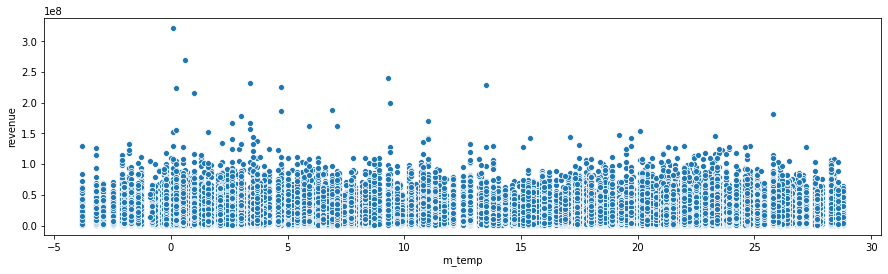

In [75]:
### 평균온도-매출 간의 산점도 그래프 ###
# 전체 데이터를 보면 12월에 매출이 증가하였음. T-commerce 시장이 성장하고 있기 때문에 
# 성장에 의한 매출액 증가인지, 온도(0~5도)에 따른 매출액 증가인지 파악이 어려움.

tmp = maindata
plt.figure(figsize=(15,4))
sns.scatterplot(data = tmp, x='m_temp', y='revenue')

<AxesSubplot:xlabel='m_temp', ylabel='revenue'>

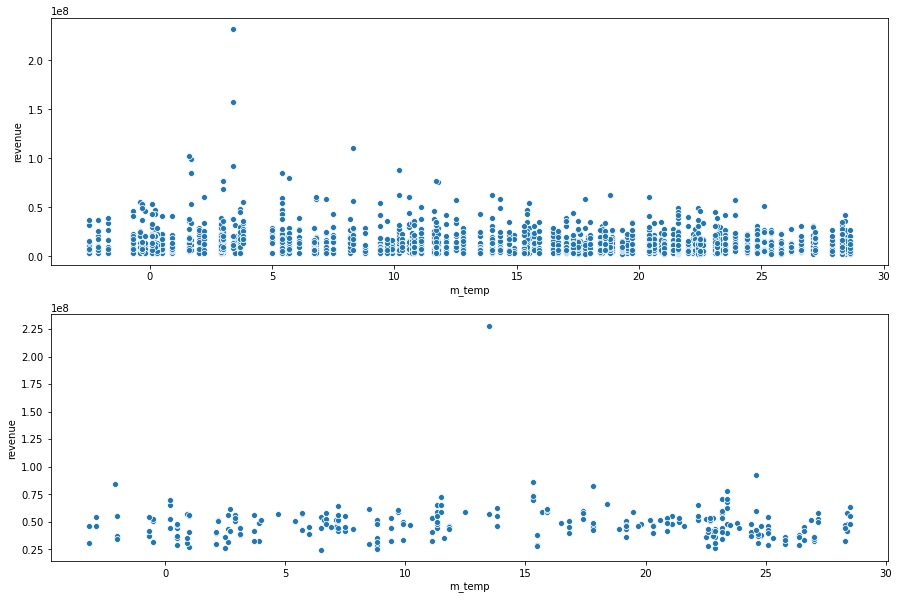

In [76]:
fig = plt.figure(figsize = (15,10)) # width x height
ax1 = fig.add_subplot(2, 1, 1) # row, column, position
ax2 = fig.add_subplot(2, 1, 2)

# 1) 판매기록이 많은 lg tv를 기준으로 온도의 영향이 있는지 살펴봄.
# 큰영향을 미치지 않는 것으로 보임(다른 상품을 통해 4~10도 사이 확인해보기)

tmp = maindata[maindata['mother_code'] == 100148]
sns.scatterplot(data = tmp, x='m_temp', ax=ax1, y='revenue')

# 2) 판매기록이 많은 판매한 쌀을 기준으로 온도의 영향이 있는지 살펴봄.
# 4~10도 사이에도 영향이 없음.
# 온도에는 큰 영향이 없는 것으로 보임.

tmp = maindata[maindata['mother_code'] == 100849]
sns.scatterplot(data = tmp, x='m_temp', ax=ax2, y='revenue')

<AxesSubplot:title={'center':'lg tv 강수량-매출의 산점도'}, xlabel='precipitation', ylabel='revenue'>

C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\workspaces\anaconda\envs\env_soo\lib\site-packages\matplotlib\backe

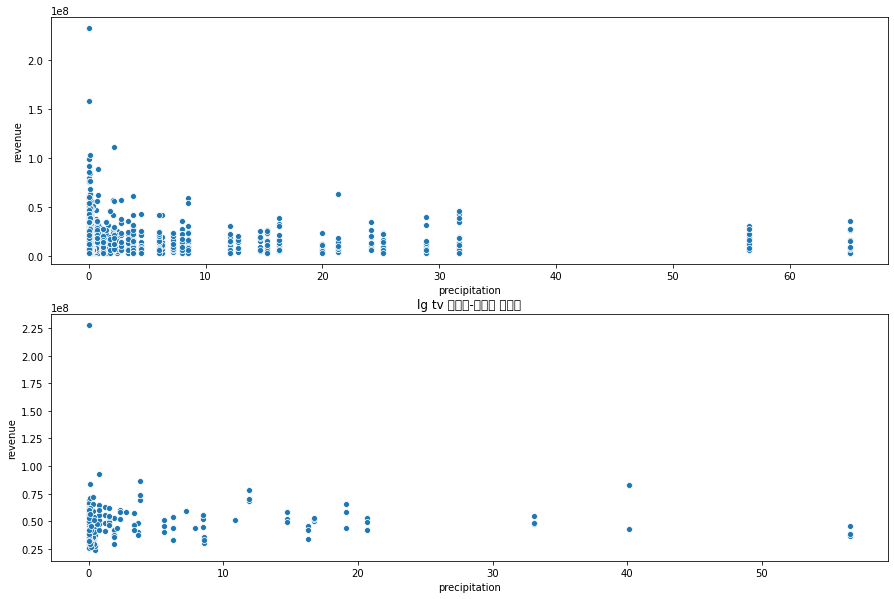

In [77]:
fig = plt.figure(figsize = (15,10)) # width x height
ax1 = fig.add_subplot(2, 1, 1) # row, column, position
ax2 = fig.add_subplot(2, 1, 2)

# 1) 판매기록이 많은 lg tv를 기준으로 강수량의 영향이 있는지 살펴봄.
# 강수량이 0 일때 매출이 높은 날이 더러 보임.

tmp = maindata[maindata['mother_code'] == 100148]
plt.title("lg tv 강수량-매출의 산점도")
sns.scatterplot(data = tmp, x='precipitation',ax=ax1, y='revenue')

# 2) 판매기록이 많은 판매한 쌀을 기준으로 강수량의 영향이 있는지 살펴봄.
# 쌀에는 큰 영향이 없음.
# tv는 비가 오지 않는 날(강수량=0인날)이 많아 매출이 높은 날이 있을 가능성이 더 높은 것으로 파악

tmp = maindata[maindata['mother_code'] == 100849]
sns.scatterplot(data = tmp, x='precipitation',ax=ax2, y='revenue')

# 4. 변수 선택 및 모델 구축
# Feature Engineering

In [62]:
"""
# 아래방법으로 파생변수 추가함. 

###########################
##### 변수추가 : repeat 변수 추가
###########################

# 보통 같은 상품에 대한 방송을 20~30분씩 2~3번 반복 방송을 함
# 이에 몇번째 반복되는 방송인지를 알려줄 수 있는 'repeat' feature를 추가함
maindata['exposure'] = maindata['exposure'].fillna(0) # 노출 시간 Nan -> 0으로 처리

repeat_list = [1]
a = 1

for i in range(1,len(maindata)):
    if (maindata['mother_code'][i] == maindata['mother_code'][i-1]) & (maindata['exposure'][i] != 0):
        a += 1
        repeat_list.append(a)
    elif (maindata['mother_code'][i] == maindata['mother_code'][i-1]) & (maindata['exposure'][i] == 0):
        repeat_list.append(a)
    else:
        a = 1
        repeat_list.append(a)
        
maindata['repeat'] = repeat_list
"""

"\n# 아래방법으로 파생변수 추가함. \n\n###########################\n##### 변수추가 : repeat 변수 추가\n###########################\n\n# 보통 같은 상품에 대한 방송을 20~30분씩 2~3번 반복 방송을 함\n# 이에 몇번째 반복되는 방송인지를 알려줄 수 있는 'repeat' feature를 추가함\nmaindata['exposure'] = maindata['exposure'].fillna(0) # 노출 시간 Nan -> 0으로 처리\n\nrepeat_list = [1]\na = 1\n\nfor i in range(1,len(maindata)):\n    if (maindata['mother_code'][i] == maindata['mother_code'][i-1]) & (maindata['exposure'][i] != 0):\n        a += 1\n        repeat_list.append(a)\n    elif (maindata['mother_code'][i] == maindata['mother_code'][i-1]) & (maindata['exposure'][i] == 0):\n        repeat_list.append(a)\n    else:\n        a = 1\n        repeat_list.append(a)\n        \nmaindata['repeat'] = repeat_list\n"

In [63]:
"""
# 아래방법으로 파생변수 추가함. 

###########################
##### 변수추가 : 노출시간(exposure) 결측치 대체
###########################

# 동시간에 여러 상품을 판 경우 맨 위의 상품에만 노출시간을 주고 아래는 결측값으로 두었기에, 맨 위 상품과 같은 노출시간을 적용함

for i in range(1,len(maindata)):
    if maindata['exposure'][i] == 0:
        maindata['exposure'][i] = maindata['exposure'][i-1]
"""

"\n# 아래방법으로 파생변수 추가함. \n\n###########################\n##### 변수추가 : 노출시간(exposure) 결측치 대체\n###########################\n\n# 동시간에 여러 상품을 판 경우 맨 위의 상품에만 노출시간을 주고 아래는 결측값으로 두었기에, 맨 위 상품과 같은 노출시간을 적용함\n\nfor i in range(1,len(maindata)):\n    if maindata['exposure'][i] == 0:\n        maindata['exposure'][i] = maindata['exposure'][i-1]\n"

In [64]:
maindata1 = maindata

# 예측할 변수를 'count'로 지정
# count * price = revenue 임으로 revenue를 예측하는 것과 mape가 같게 나온다.

# MAPE = mean (true_count - predicted_count) / (true_count)
#      = mean (true_count * price - predicted_count * price) / (true_count * price)
#      = mean (true_revenue - predicted_revenue) / true_revenue

# numeric 변수를 정규화 하기위해 numpy fuction log1p (=log(1+x))를 적용한다. 
maindata1['count_log'] = np.log1p(maindata1['count'])
maindata1['price_log'] = np.log1p(maindata1['price'])

In [65]:
maindata1 = maindata1.drop(['l_temp','h_temp','m_temp','dayofweek','precipitation', 'mother_code',
                        'datetime','name', 'timecat', 'year', 'revenue', 'minute','date','count','price'], axis=1)

In [66]:
ns_june = pd.read_csv("ns_june.csv")

In [67]:
maindata1 = maindata1.append(ns_june)

In [68]:
#원핫 인코딩
categorical_feature_names = ["category","holiday","exposure","repeat","hour","code"]

for var in categorical_feature_names:
    maindata1[var] = maindata1[var].astype("category")
    
maindata1 = pd.get_dummies(maindata1)


#column name 정렬
col_list = list(maindata1.columns.values)
col_list.remove('count_log')
col_list.append('count_log')
maindata1 = maindata1.reindex(columns = col_list)

ns_june = maindata1[35379:]
maindata1 = maindata1[0:35379]

# train, test set 분류
# train set: 2019년 1월 ~ 2019년 11월 data
# test set: 2019년 12월 data
X_test = maindata1[maindata1['month']==12].iloc[:,:-1].drop(['month'],axis=1)
X_train = maindata1[maindata1['month']!=12].iloc[:,:-1].drop(['month'],axis=1)
y_test = maindata1[maindata1['month']==12].iloc[:,-1]
y_train = maindata1[maindata1['month']!=12].iloc[:,-1]

In [69]:
"""
maindata1 = maindata

# 예측할 변수를 'count'로 지정
# count * price = revenue 임으로 revenue를 예측하는 것과 mape가 같게 나온다.

# MAPE = mean (true_count - predicted_count) / (true_count)
#      = mean (true_count * price - predicted_count * price) / (true_count * price)
#      = mean (true_revenue - predicted_revenue) / true_revenue

# numeric 변수를 정규화 하기위해 numpy fuction log1p (=log(1+x))를 적용한다. 
maindata1['count_log'] = np.log1p(maindata1['count'])
maindata1['price_log'] = np.log1p(maindata1['price'])
"""

"\nmaindata1 = maindata\n\n# 예측할 변수를 'count'로 지정\n# count * price = revenue 임으로 revenue를 예측하는 것과 mape가 같게 나온다.\n\n# MAPE = mean (true_count - predicted_count) / (true_count)\n#      = mean (true_count * price - predicted_count * price) / (true_count * price)\n#      = mean (true_revenue - predicted_revenue) / true_revenue\n\n# numeric 변수를 정규화 하기위해 numpy fuction log1p (=log(1+x))를 적용한다. \nmaindata1['count_log'] = np.log1p(maindata1['count'])\nmaindata1['price_log'] = np.log1p(maindata1['price'])\n"

In [70]:
#maindata1.columns

In [71]:
"""
maindata1 = maindata1.drop(['l_temp','h_temp','m_temp','precipitation','Unnamed: 0', 'mother_code',
                        'datetime','name','time', 'timecat', 'year', 'revenue', 'minute','date','count','price'], axis=1)
#원핫 인코딩
categorical_feature_names = ["category","dayofweek","code","exposure","midcategory","subcategory","hour"]

for var in categorical_feature_names:
    maindata1[var] = maindata1[var].astype("category")
    
maindata1 = pd.get_dummies(maindata1)


#column name 정렬
col_list = list(maindata1.columns.values)
col_list.remove('count_log')
col_list.append('count_log')
maindata1 = maindata1.reindex(columns = col_list)

# train, test set 분류
# train set: 2019년 1월 ~ 2019년 11월 data
# test set: 2019년 12월 data
X_test = maindata1[maindata1['month']==12].iloc[:,:-1].drop(['month'],axis=1)
X_train = maindata1[maindata1['month']!=12].iloc[:,:-1].drop(['month'],axis=1)
y_test = maindata1[maindata1['month']==12].iloc[:,-1]
y_train = maindata1[maindata1['month']!=12].iloc[:,-1]
"""

'\nmaindata1 = maindata1.drop([\'l_temp\',\'h_temp\',\'m_temp\',\'precipitation\',\'Unnamed: 0\', \'mother_code\',\n                        \'datetime\',\'name\',\'time\', \'timecat\', \'year\', \'revenue\', \'minute\',\'date\',\'count\',\'price\'], axis=1)\n#원핫 인코딩\ncategorical_feature_names = ["category","dayofweek","code","exposure","midcategory","subcategory","hour"]\n\nfor var in categorical_feature_names:\n    maindata1[var] = maindata1[var].astype("category")\n    \nmaindata1 = pd.get_dummies(maindata1)\n\n\n#column name 정렬\ncol_list = list(maindata1.columns.values)\ncol_list.remove(\'count_log\')\ncol_list.append(\'count_log\')\nmaindata1 = maindata1.reindex(columns = col_list)\n\n# train, test set 분류\n# train set: 2019년 1월 ~ 2019년 11월 data\n# test set: 2019년 12월 data\nX_test = maindata1[maindata1[\'month\']==12].iloc[:,:-1].drop([\'month\'],axis=1)\nX_train = maindata1[maindata1[\'month\']!=12].iloc[:,:-1].drop([\'month\'],axis=1)\ny_test = maindata1[maindata1[\'month\']==12].

### RandomForest Grid Search
- 시간이 아주 오래걸림
- Modelling에 바로 적용함

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 287, 525, 762, 1000]}


UnicodeEncodeError: 'ascii' codec can't encode characters in position 18-20: ordinal not in range(128)

### XGBoost Grid Search
- 시간이 아주 오래걸림
- Modelling에 바로 적용함

In [41]:
MAPE_list = []

# grid search1 : max_depth_list
max_depth_list = [7,9,11,13,15]

for max_depth in max_depth_list:
    xgb_model = XGBRegressor(learning_rate=0.05,n_estimators=1000, max_depth=max_depth, seed=0, 
                             gamma=0.1, colsample_bytree=0.4, subsample=0.8)
    xgb_pred = np.expm1(xgb_model.fit(X_train, y_train).predict(X_test))
    y_test_tmp = np.expm1(y_test)
    MAPE_list.append(mean_absolute_percentage_error(y_test_tmp, xgb_pred))

depth_mape_df = pd.DataFrame({'tree depth':max_depth_list, 'mape':MAPE_list})
selected_dep = depth_mape_df.sort_values(by='mape_test', ascending=False)['tree depth'][0]

# grid search2 : n_estimators_list
n_estimators_list = [500, 1000, 2000, 2500]

for n_estimators in n_estimators_list:
    xgb_model = XGBRegressor(learning_rate=0.05,n_estimators=n_estimators, max_depth=selected_dep, seed=0)
    xgb_pred = np.expm1(xgb_model.fit(X_train, y_train).predict(X_test))
    y_test_tmp = np.expm1(y_test)
    MAPE_list.append(mean_absolute_percentage_error(y_test_tmp, xgb_pred))

estimators_mape_df = pd.DataFrame({'num of estimators':n_estimators_list, 'mape':MAPE_list})
selected_e = estimators_mape_df.sort_values(by='mape_test', ascending=False)['num of estimators'][0]

# grid search3 : learning_rate_list
learning_rate_list = [0.1, 0.05, 0.01]

for learning_rate in learning_rate_list:
    xgb_model = XGBRegressor(learning_rate=learning_rate,n_estimators=selected_e, max_depth=selected_dep, seed=0, 
                             gamma=0.1, colsample_bytree=0.4, subsample=0.8)
    xgb_pred = np.expm1(xgb_model.fit(X_train, y_train).predict(X_test))
    y_test_tmp = np.expm1(y_test)
    MAPE_list.append(mean_absolute_percentage_error(y_test_tmp, xgb_pred))

lr_mape_df = pd.DataFrame({'learning rate':learning_rate_list, 'mape':MAPE_list})
selected_lr = lr_mape_df.sort_values(by='mape_test', ascending=False)['learning rate'][0]

# grid search4 : gamma_list
gamma_list = [0, 0.1, 0.5, 1, 5]

for gamma in gamma_list:
    xgb_model = XGBRegressor(learning_rate=selected_lr,n_estimators=selected_e, max_depth=selected_dep, seed=0, gamma=gamma)
    xgb_pred = np.expm1(xgb_model.fit(X_train, y_train).predict(X_test))
    y_test_tmp = np.expm1(y_test)
    MAPE_list.append(mean_absolute_percentage_error(y_test_tmp, xgb_pred))

gamma_mape_df = pd.DataFrame({'gamma':gamma_list, 'mape':MAPE_list})
selected_g = gamma_mape_df.sort_values(by='mape_test', ascending=False)['gamma'][0]

# grid search5 : colsample_bytree_list
colsample_bytree_list = [0.2, 0.4, 0.6, 0.8, 1]

for colsample_bytree in colsample_bytree_list:
    xgb_model = XGBRegressor(learning_rate=selected_lr,n_estimators=selected_e, max_depth=selected_dep, seed=0, 
                             gamma=selected_g, colsample_bytree=colsample_bytree)
    xgb_pred = np.expm1(xgb_model.fit(X_train, y_train).predict(X_test))
    y_test_tmp = np.expm1(y_test)
    MAPE_list.append(mean_absolute_percentage_error(y_test_tmp, xgb_pred))

cb_mape_df = pd.DataFrame({'colsample':colsample_bytree_list, 'mape':MAPE_list})
selected_cb = cb_mape_df.sort_values(by='mape_test', ascending=False)['colsample'][0]

# grid search6 : subsample_list
subsample_list = [0.2, 0.4, 0.6, 0.8, 1]

for subsample in subsample_list:
    xgb_model = XGBRegressor(learning_rate=selected_lr,n_estimators=selected_e, max_depth=selected_dep, seed=0, 
                             gamma=selected_g, colsample_bytree=selected_cb, subsample=subsample)
    xgb_pred = np.expm1(xgb_model.fit(X_train, y_train).predict(X_test))
    y_test_tmp = np.expm1(y_test)
    MAPE_list.append(mean_absolute_percentage_error(y_test_tmp, xgb_pred))

ss_mape_df = pd.DataFrame({'subsample':subsample_list, 'mape':MAPE_list})
ss_mape_df

[16:08:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

# 5. 모델 학습 및 검증
# Model Tuning & Evaluation

In [72]:
# MAPE 평가 지표
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### 1) RandomForest

In [83]:
# RandomForest 최종 적용 모델
rf = RandomForestRegressor(random_state=0, n_estimators=500, n_jobs=-1)
rf.fit(X_train,y_train)

# 예측
rf_pred = np.expm1(rf.predict(X_test))
rf_pred_self = np.expm1(rf.predict(X_train))

# MAPE 점수
print("MAPE test score: " + str(mean_absolute_percentage_error(np.expm1(y_test) , rf_pred)))
print("MAPE train score: " + str(mean_absolute_percentage_error(np.expm1(y_train), rf_pred_self)))

ValueError: could not convert string to float: '2019-01-01 06:00:00'

### 2) XGBoost

In [73]:
# XGBoost 최종 적용 모델
xgb_model = XGBRegressor(learning_rate=0.05,n_estimators=2500, max_depth=10, seed=0, 
                          gamma=0.1, colsample_bytree=0.6, subsample=0.9)
xgb_model.fit(X_train, y_train)
xgb_pred = np.expm1(xgb_model.predict(X_test))
xgb_pred_self = np.expm1(xgb_model.predict(X_train))

print("MAPE test: "+str(mean_absolute_percentage_error(np.expm1(y_test), xgb_pred)))
print("MAPE train: "+str(mean_absolute_percentage_error(np.expm1(y_train), xgb_pred_self)))

[16:44:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

### 3) RNN

#### 데이터 읽어오기 / 불필요한 column제거 / 결측치제거¶

In [23]:
maindata = pd.read_csv("rnn1.csv")

In [24]:
maindata.drop(['Unnamed: 0',  'date', 'time',
       'hour', 'minute', 'holiday_1', 'datetime', 'name',
        'code',], axis=1,inplace=True)

In [25]:
maindata = maindata.dropna(axis=0)

In [26]:
# revenue 5만원 미만 삭제
maindata = maindata[maindata.revenue>50000.0]

In [27]:
# revenue = count*price이고 
# count의 숫자가 더 가시적이므로 예측을 count로 할것입니다.

maindata.drop(['year', 'month', 'revenue'], axis =1, inplace=True)

#### 파생변수 추가 - midcategory, subcategory

In [28]:
# "data"에 있는 midcategory feature 불러오기
data = pd.read_csv("rnn2.csv")
midcategory_list = list(set(data['midcategory'].tolist()))

midcategory_dict = []
for i in range(0,len(midcategory_list)):
    midcategory_tuple = (midcategory_list[i],i)
    midcategory_dict.append(midcategory_tuple)

midcategory_dict = dict(midcategory_dict)



# "data"에 있는 subcategory feature 불러오기
data = pd.read_csv("rnn2.csv")
subcategory_list = list(set(data['subcategory'].tolist()))

subcategory_dict = []
for i in range(0,len(subcategory_list)):
    subcategory_tuple = (subcategory_list[i],i)
    subcategory_dict.append(subcategory_tuple)

subcategory_dict = dict(subcategory_dict)


# mydata에 midcategory 추가하기
maindata.drop(['exposure'], axis=1, inplace=True)
maindata.reset_index(inplace=True)
data.reset_index(inplace=True)
data = data[['index','exposure','midcategory','subcategory']]
maindata = pd.merge(maindata, data, on=['index'], how='left')[[ 'dayofweek','exposure','repeat',
                                                              'category','midcategory','subcategory',
                                                              'sex', 'price', 
                                                              'installment','mother_code',
                                                              'count']]

#### column의 문자형 데이터를 숫자형으로 재매개화

In [29]:
# midcategory 재매개화
map_midcategory = midcategory_dict
col=['midcategory']
maindata[col] = maindata[col].applymap(map_midcategory.get)

# subcategory 재매개화
map_subcategory = subcategory_dict
col=['subcategory']
maindata[col] = maindata[col].applymap(map_subcategory.get)

# 성별 재매개화
map_sex = {'남성':0, '여성':1, '무관':2}
col=['sex']
maindata[col] = maindata[col].applymap(map_sex.get)

# category 재매개화
map_category = {'가구':0, '가전':1, '건강기능':2, '농수축':3, '생활용품':4, '속옷':5, 
                '의류':6, '이미용':7, '잡화':9, '주방':10, '침구':11}
col=['category']
maindata[col] = maindata[col].applymap(map_category.get)

# installment 재매개화
map_installment = {'일시불':0, '무이자':1, '무관':2}
col=['installment']
maindata[col] = maindata[col].applymap(map_installment.get)

#### 기본 전처리한 데이터 저장

In [30]:
maindata.to_csv("rnn3.csv", header=True, index=False)

#### Input 데이터로 가공

In [31]:
maindata= pd.read_csv("rnn3.csv")


# 8개columnd을 one-hot encoding
categorical_feature_names = ["dayofweek", "category", "mother_code", "sex", "repeat", "installment","midcategory", "subcategory"]

for var in categorical_feature_names:
    maindata[var] = maindata[var].astype("category")
    
maindata_onehot = pd.get_dummies(maindata)

#### Output 데이터로 가공

In [32]:
my_target= pd.read_csv("rnn3.csv")

# revenue = count*price이고 
# count의 숫자가 더 가시적이므로 예측을 count로 할것입니다.

my_target.drop(['dayofweek', 'category', 'exposure', 'repeat', 'installment', 'midcategory', 'sex', 'price', 'mother_code', 'subcategory'], axis=1, inplace=True)

#### rnn모델에 적용하기 위한 가공

In [33]:
# numpy로 변환
x_data = maindata_onehot.values
print(type(x_data))
print("Shape:", x_data.shape)

y_data = my_target.values
print(type(y_data))
print("Shape:", y_data.shape)

# 학습에 사용될 비율
train_split=0.9
num_data = len(x_data)

# 학습에 사용될 데이터 수 - train
num_train = int(train_split*num_data)

# 학습된 모델을 검증할 데이터 수 - test
num_test = num_data - num_train

<class 'numpy.ndarray'>
Shape: (35379, 1362)
<class 'numpy.ndarray'>
Shape: (35379, 1)


#### Input, Output 데이터를 train / test로 나눔

In [34]:
x_train = x_data[0:num_train] # x_data의 90%
x_test = x_data[num_train:] # x_data의 10%

y_train = y_data[0:num_train] # y_data의 90%
y_test = y_data[num_train:] # y_data의 10%

In [35]:
## Input / Output 신호 수
#input
num_x_signals = x_data.shape[1]
print(num_x_signals)

#Output
num_y_signals = y_data.shape[1]
print(num_y_signals)

1362
1


#### 데이터 정규화 - MinMax

In [36]:
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_tested_scaled = x_scaler.fit_transform(x_test)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_tested_scaled = y_scaler.fit_transform(y_test)

#### batch / sequenceLength 생성

In [37]:
def batch_generator(batch_size, sequence_length):
    while True:
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape = x_shape, dtype = np.float16)
        
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape = y_shape, dtype = np.float16)
        
        for i in range(batch_size):
            idx = np.random.randint(num_train - sequence_length)
            
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [38]:
batch_size = 128
sequence_length = 24*7*4 #24시간*7일*4주

generator = batch_generator(batch_size = batch_size, 
                            sequence_length = sequence_length)

x_batch, y_batch = next(generator)

#### test 데이터 차원확장

In [39]:
# 검증용으로 들어갈 test 데이터 또한 rnn에 들어가기 위해 3차원 배열로 만듬

validation_data = (np.expand_dims(x_tested_scaled, axis=0), 
                   np.expand_dims(y_tested_scaled, axis=0))

#### 모델 생성

In [40]:
model = Sequential()
model.add(GRU(units=128, return_sequences=True, input_shape=(None, num_x_signals,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_y_signals, activation='relu'))

# 손실함수 - MSE
def loss_mse_warmup(y_true, y_pred):
    loss = tf.keras.losses.MSE(y_true, y_pred)       
    return loss

# 모델컴파일
optimizer = RMSprop(lr=1e-3) # 학습율0.001
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 128)         572928    
_________________________________________________________________
dense (Dense)                (None, None, 50)          6450      
_________________________________________________________________
dense_1 (Dense)              (None, None, 50)          2550      
_________________________________________________________________
dense_2 (Dense)              (None, None, 50)          2550      
_________________________________________________________________
dropout (Dropout)            (None, None, 50)          0         
_________________________________________________________________
dense_3 (Dense)              (None, None, 50)          2550      
_________________________________________________________________
dense_4 (Dense)              (None, None, 50)          2

#### callback function

In [41]:
path_checkpoint = 'checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss', verbose=1, 
                                      save_weigths_only=True, save_best_only=True)

callback_early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

callback_tensorboard = TensorBoard(log_dir = 'C:/workspaces/AI/finalProj/logs/', 
                                   histogram_freq=0, write_graph=False, profile_batch = 100000000 )

callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, 
                                       min_lr=1e-4, patience=0, verbose=1)

callbacks = [callback_early_stopping, callback_checkpoint, 
             callback_tensorboard, callback_reduce_lr]

#### RNN 학습

In [42]:
%%time
model.fit(x=x_batch, y=y_batch, epochs=8, 
          validation_data=validation_data, callbacks=callbacks)

Train on 128 samples, validate on 1 samples
Epoch 1/8
 96/128 [=====================>........] - ETA: 2s - loss: 0.0064
Epoch 00001: val_loss improved from inf to 0.00418, saving model to checkpoint.keras
128/128 [==============================] - 11s 88ms/sample - loss: 0.0057 - val_loss: 0.0042
Epoch 2/8
 96/128 [=====================>........] - ETA: 2s - loss: 0.0030
Epoch 00002: val_loss improved from 0.00418 to 0.00375, saving model to checkpoint.keras
128/128 [==============================] - 9s 72ms/sample - loss: 0.0029 - val_loss: 0.0038
Epoch 3/8
 96/128 [=====================>........] - ETA: 2s - loss: 0.0024
Epoch 00003: val_loss improved from 0.00375 to 0.00308, saving model to checkpoint.keras
128/128 [==============================] - 9s 72ms/sample - loss: 0.0024 - val_loss: 0.0031
Epoch 4/8
 96/128 [=====================>........] - ETA: 2s - loss: 0.0020
Epoch 00004: val_loss did not improve from 0.00308

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0

#### 결과확인

In [43]:
# MAPE 정의
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 그래프 시각화로 확인
def plot_comparison(start_idx, length=100, train=True):
    
    if train:
        x = x_train_scaled
        y_true = y_train        
        
    else:
        x = x_tested_scaled
        y_true = y_test
        
    end_idx = start_idx + length
    
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    x = np.expand_dims(x, axis=0)
    y_pred = model.predict(x)
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])

    signal_pred = y_pred_rescaled[:]
    signal_true = y_true[:]

    MAPE = mean_absolute_percentage_error(y_true, y_pred_rescaled)
    print('MAPE :',MAPE)
    
    plt.figure(figsize=(30,10))
    plt.plot(signal_true, label='true')
    plt.plot(signal_pred, label='pred')

    plt.ylabel('count')
    plt.legend()
    plt.show()
    
    
# 데이터프레임으로 확인
def dataframe_comparison(start_idx, length=100, train=True):
    
    if train:
        x = x_train_scaled
        y_true = y_train        
        
    else:
        x = x_tested_scaled
        y_true = y_test
                
    end_idx = start_idx + length
    
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    x = np.expand_dims(x, axis=0)
    y_pred = model.predict(x)
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])  
   
    signal_pred = y_pred_rescaled[:]
    signal_true = y_true[:]
    
    com_np = np.concatenate((signal_true, signal_pred), axis=1)
    com_df = pd.DataFrame(com_np)
    com_df.columns=['True', 'Pred']
    
    return com_df

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


MAPE : 335.54638706445184


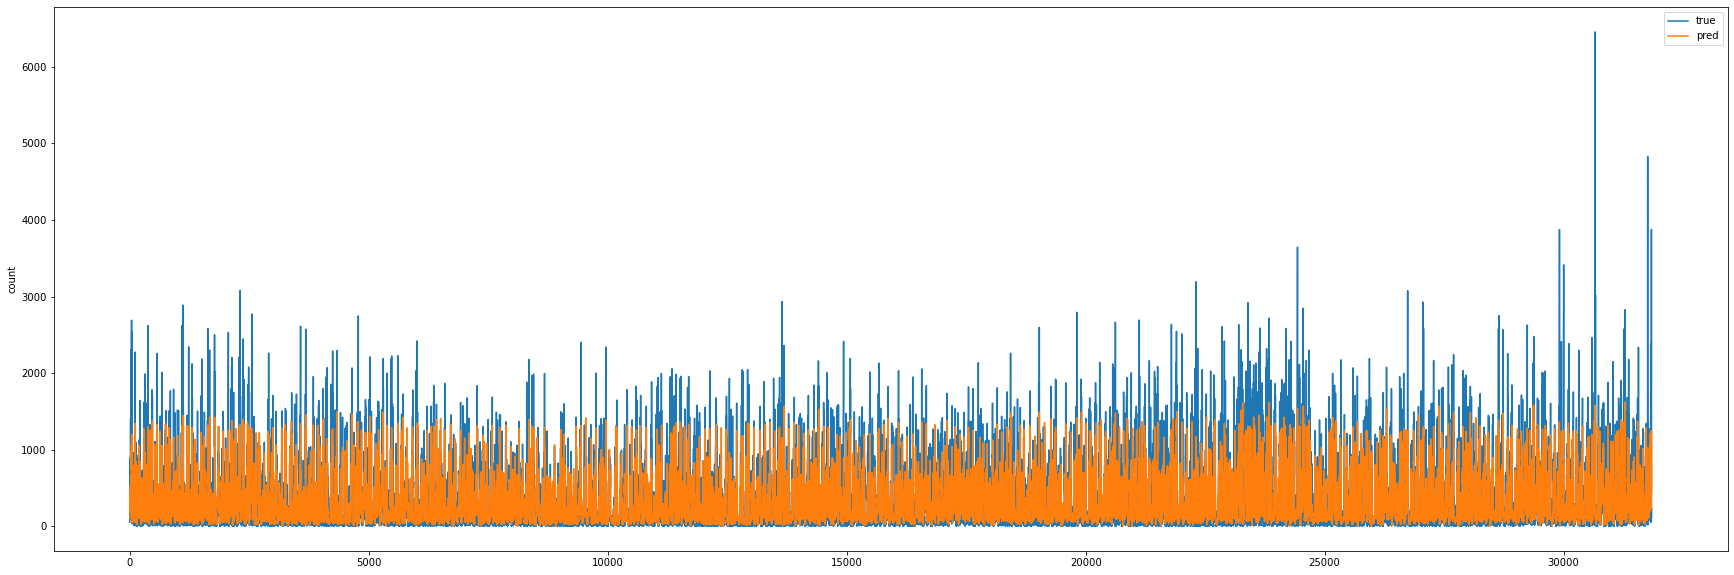

In [44]:
# train 데이터로 확인 - 그래프
plot_comparison(0, length=len(x_train), train=True)

In [45]:
# train 데이터로 확인 - dataframe
train_result=dataframe_comparison(0, length=len(x_train), train=True)
train_result

,True,Pred
0,52.606516,111.492294
1,109.548872,108.567390
2,81.754386,151.380127
3,174.310777,161.651901
4,167.218045,166.436615
...,...,...
31836,3877.056856,1251.156250
31837,218.881469,871.556152
31838,247.612688,912.322205
31839,229.515860,888.780579


MAPE : 321.0015485318874


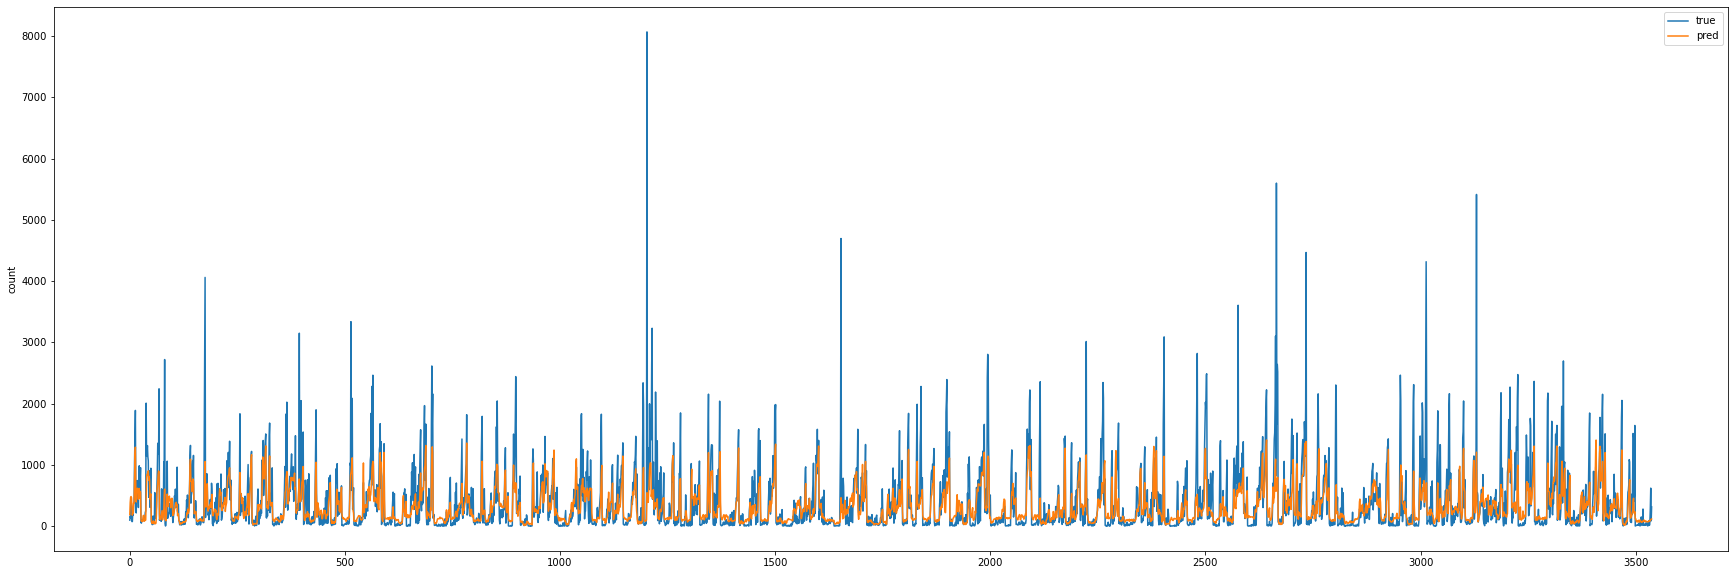

In [46]:
# test 데이터로 확인 - 그래프
plot_comparison(0, length=len(x_test), train=False)

In [47]:
# test 데이터로 확인 - dataframe
test_result=dataframe_comparison(0, length=len(x_test), train=False)
test_result

,True,Pred
0,98.712446,186.160706
1,163.032904,389.331543
2,138.025751,472.742432
3,412.947067,483.324402
4,226.981402,464.844116
...,...,...
3533,68.628378,81.136124
3534,286.117978,97.081024
3535,621.380952,105.755638
3536,87.120253,111.229973


# 6. 결과 및 결언
# Conclusion & Discussion

In [ ]:
X_train

In [ ]:
ns_june

In [ ]:
# 6월 데이터에 적용 및 예측치 도출
ns_june.drop(['month','count_log'], axis=1, inplace=True)

xgb_pred = np.expm1(rf.predict(ns_june))

# 결과 데이터 내보내기
nsresult = pd.read_csv("ns_june.csv")
nsresult['revenue_pred'] = xgb_pred
nsresult.to_csv("nsresult.csv")

RandomForest, XGBoost, RNN 모델으로 시도하였으며 Test-set(12월)의 MAPE는 각각, 51.70657, 46.98344, 308.2으로 도출되었습니다. 이중 MAPE가 가장 높은 XGBoost 모델을 최종 선정하여 6월 데이터 예측을 진행하였습니다.

다른 상품에 비해 아주 매출이 높거나, 낮은 상품들에 대한 예측이 아쉬웠습니다. 특히 MAPE의 특성상 분모(실제값)이 작은 데이터들은 오차('실제값-예측값'의 절대값)가 다른 상품에 비해 상대적으로 작더라도 MAPE 점수가 굉장히 크게 되어 최종 점수에 큰 영향을 미쳤습니다. 

여러 참고 자료에 홈쇼핑 매출에 날씨가 영향을 미친다고 나와있습니다. 날씨와 매출간의 상관관계를 파악하기 위해 다양한 시각화를 진행하였으나 연관성을 찾지 못했고 예측에 반영하지 못한 점이 아쉽습니다. 날씨와 매출이 선형관계는 아니더라도 임계점이되는 기온이나 강수량이 있지 않을까 생각이 됩니다.

마지막으로 2020년은 T-commerce 시장의 확장세와 코로나의 영향으로 전체적으로 2019년보다 매출이 증가했을 가능성이 큽니다. 이를 어떤 외부 데이터를 반영하여 찾을지 고민하였으나, 효과적인 지표를 찾지 못하였습니다. 다만 nsshop+ 기사에 '농수축'분야에 있어 x%의 매출 증가가 있다는 것을 결과 데이터에 직접 반영하여 예측된 '농수축' 매출에 x를 곱하여 증가한 매출을 최종 예측으로 결정했습니다. 